In [1]:
import pandas as pd
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info


d:\DRIVE_PORTATIL2\Portatil2\Desktop\Personal\PLATZI\.venv\lib\site-packages\janitor\utils.py:84: FutureWarning: PandasArray has been renamed NumpyExtensionArray. Use that instead. This alias will be removed in a future version.
  @_expand_grid.register(pd.arrays.PandasArray)


In [2]:
preprocessed_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

## Establecer apariencia general de los gráficos


In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos
**Utilizando el paquete palmerpenguins**

Datos crudos

In [4]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


**Utilizando el paquete palmerpenguins**

Datos preprocesados

In [5]:
raw_penguins_df = palmerpenguins.load_penguins()
raw_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


**Utilizando Seaborn**


In [6]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?



In [7]:
preprocessed_penguins_df.dtypes


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?


In [8]:
preprocessed_penguins_df.dtypes.value_counts()


float64    4
object     3
int64      1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?


In [9]:
preprocessed_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [10]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?


In [11]:
preprocessed_penguins_df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
preprocessed_penguins_df.isnull().sum().sum()

19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [13]:
preprocessed_penguins_df.isnull().melt()

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


## ¿Cuál es la proporción de valores nulos por cada variable? PLOT

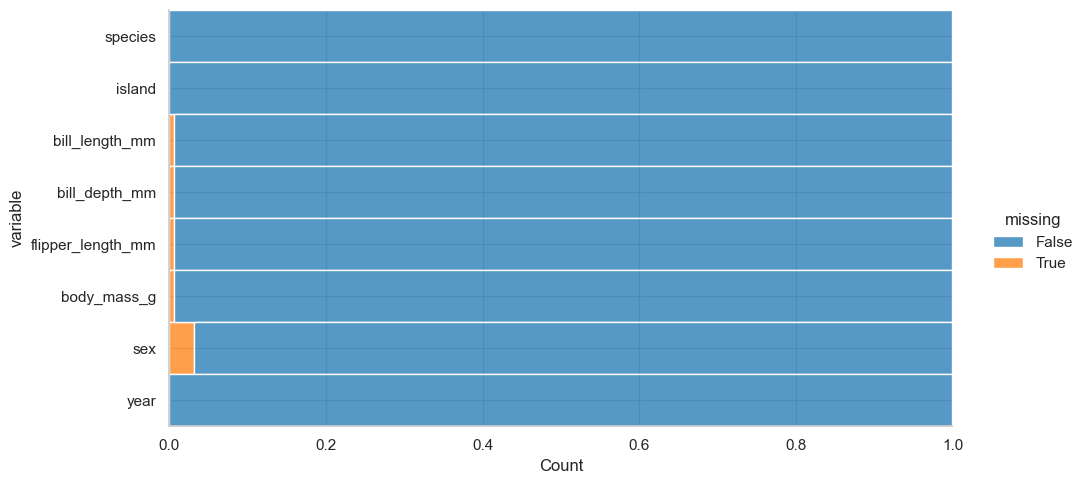

In [14]:
def create_missing_plot(df):
    sns.displot(data=df,y='variable',hue='missing',multiple='fill',aspect=2)


melted_df = (
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
)

create_missing_plot(melted_df)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?


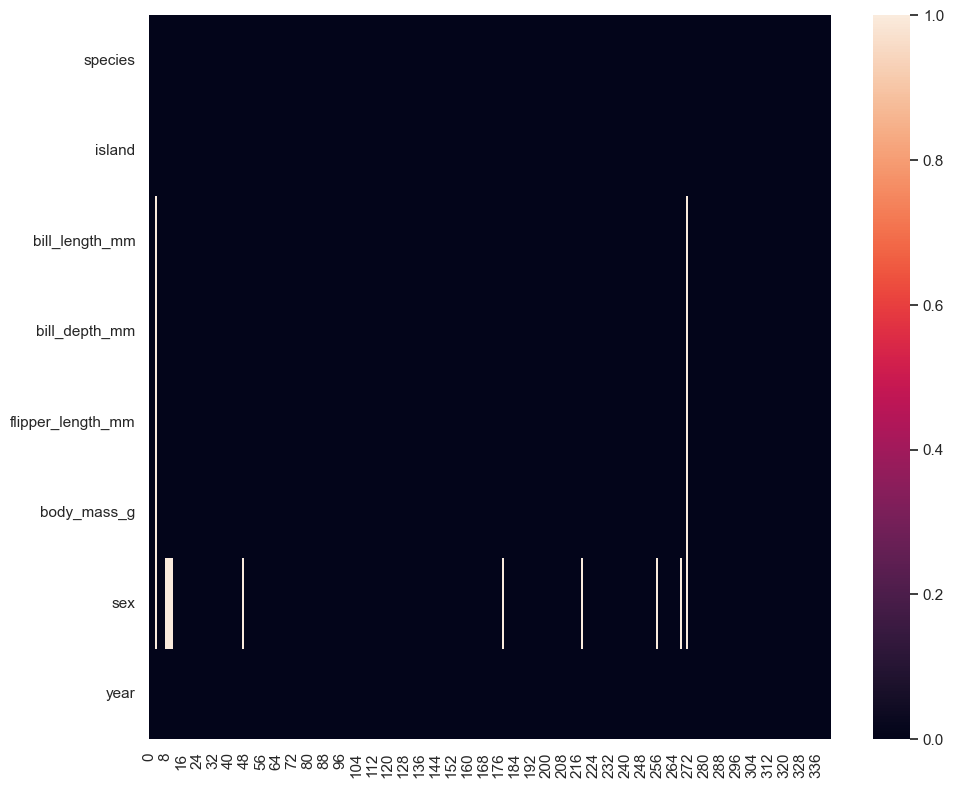

In [15]:
def plot_miss(df):
    sns.heatmap(data=df)

transposed = (
preprocessed_penguins_df.isnull().transpose())

plot_miss(transposed)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos? PLOT



In [16]:
preprocessed_penguins_df.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?


In [17]:
processed_penguins_df= preprocessed_penguins_df.dropna()
print(preprocessed_penguins_df.shape)
print(processed_penguins_df.shape)
processed_penguins_df

(344, 8)
(333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Conteos y proporciones
## Preludio: ¿Qué estadísticos describen el conjunto de datos?
**Todas las variables**


In [18]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


**solo numericas**

In [19]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Solo categoricas 1**

In [20]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


**solo categoricas 2**

In [21]:
processed_penguins_df.astype({
    'species':'category',
    'island':'category',
    'sex':'category'
}).describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?
**pandas**

<Axes: xlabel='species'>

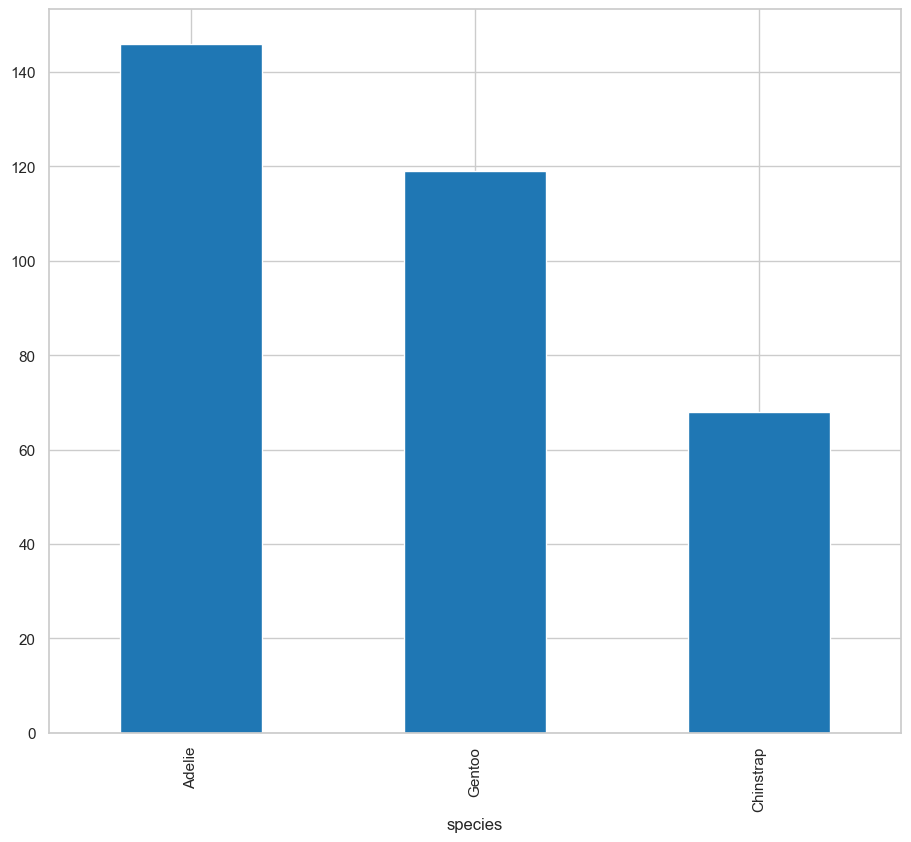

In [22]:
processed_penguins_df.species.value_counts().plot(kind='bar')

**Seaborn**

In [23]:


processed_penguins_df.value_counts('species', sort=True).reset_index(name='count')

,species,count
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


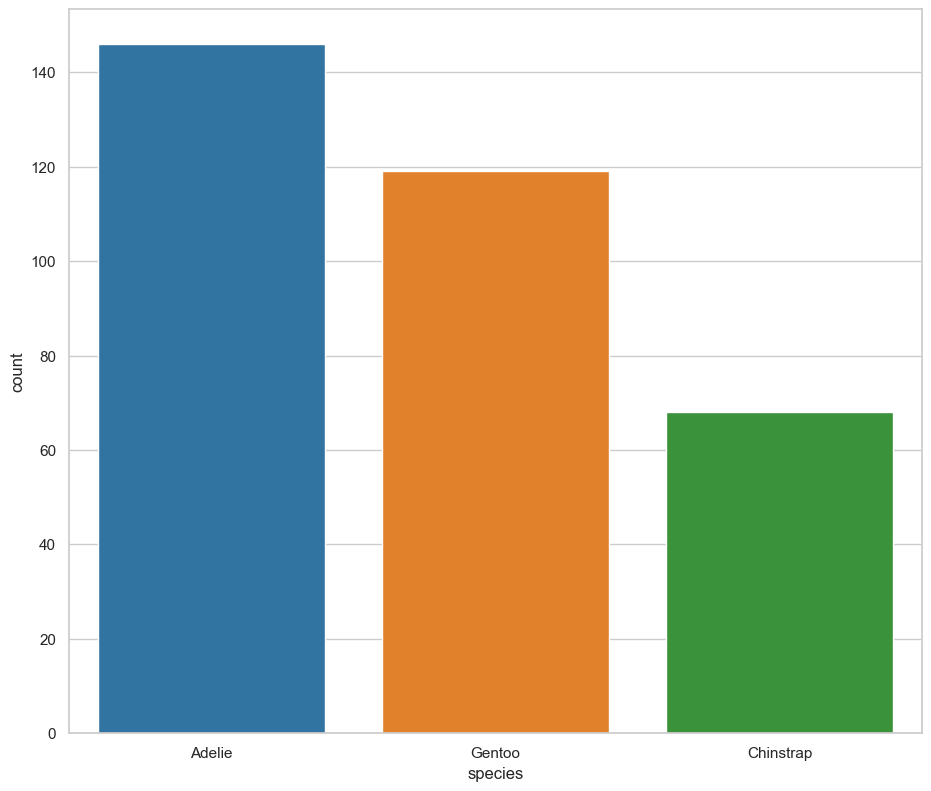

In [24]:
ext =(processed_penguins_df
      .value_counts('species',sort=True)
      .reset_index(name='count')
      )

def create_species_count_plot(df):
    sns.barplot(data=df,
                x='species',
                y='count',
                hue='species')

create_species_count_plot(ext)

## ¿Cómo visualizar las proporciones?


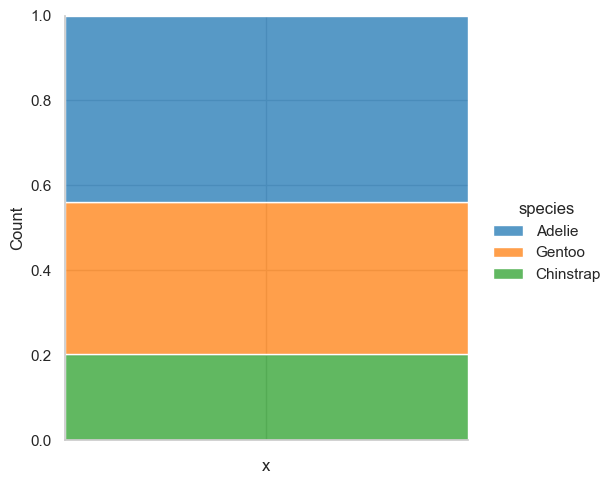

In [25]:
ext2 = (
    processed_penguins_df.add_column('x','')
)

def plot_portion(df):
    sns.displot(data=df,
                x='x',
                hue='species',
                multiple='fill'
                )

plot_portion(ext2)
    

# Medidas de tendencia central
## Media o promedio


In [26]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [27]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [28]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana


In [29]:
processed_penguins_df.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [30]:
processed_penguins_df.mode(numeric_only=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [31]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


# Medidas de dispersión
## ¿Cuál es el valor máximo de las variables?


In [32]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor minimo de las variables?

In [33]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?


In [34]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?


In [35]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [36]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## ¿Cuál es el rango intercuartílico?


In [37]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [38]:
processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [39]:
rangoInterq = processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)
print(rangoInterq)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64


In [40]:
processed_penguins_df.quantile(q=[0.75,0.5,0.25],numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0.75,48.6,18.7,213.0,4775.0,2009.0
0.50,44.5,17.3,197.0,4050.0,2008.0
0.25,39.5,15.6,190.0,3550.0,2007.0


In [41]:

(   
processed_penguins_df.quantile(q=[0.75,0.5,0.25],numeric_only=True).transpose()
.rename_axis('variable').reset_index().assign(iqr=lambda df:df[0.75]-df[0.25])
)
    

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


# ¿Cómo puedo visualizar la distribución de una variable?
## Histograma

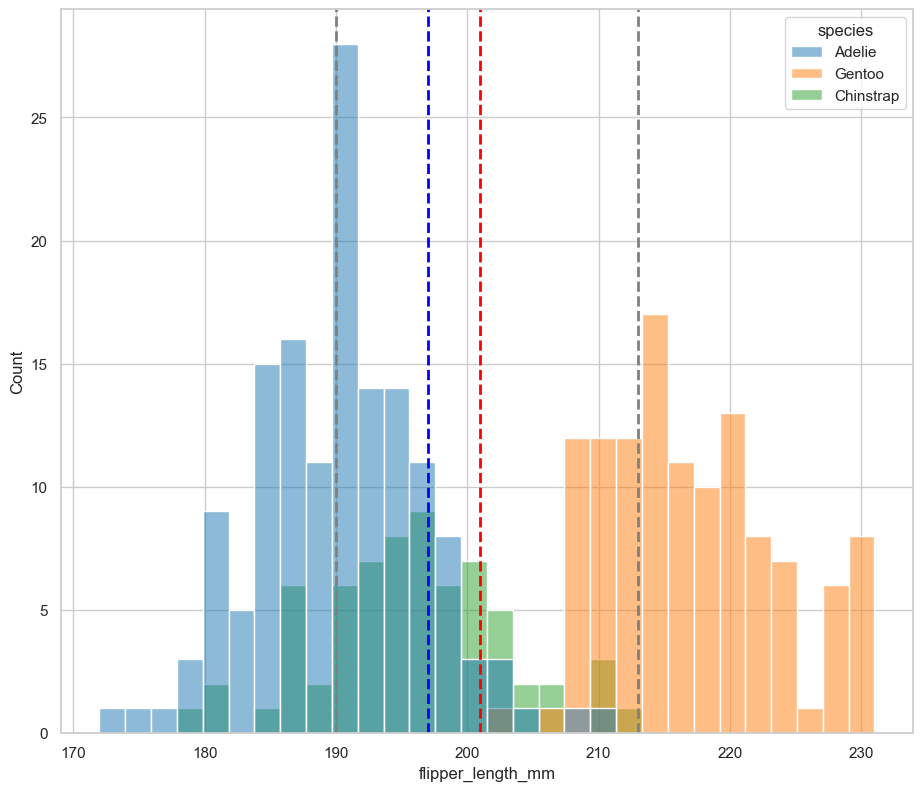

In [42]:
sns.histplot(data=processed_penguins_df,
             x='flipper_length_mm',
             bins=30,
             hue='species')

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

## Diagrama de caja / boxplot


<Axes: xlabel='flipper_length_mm'>

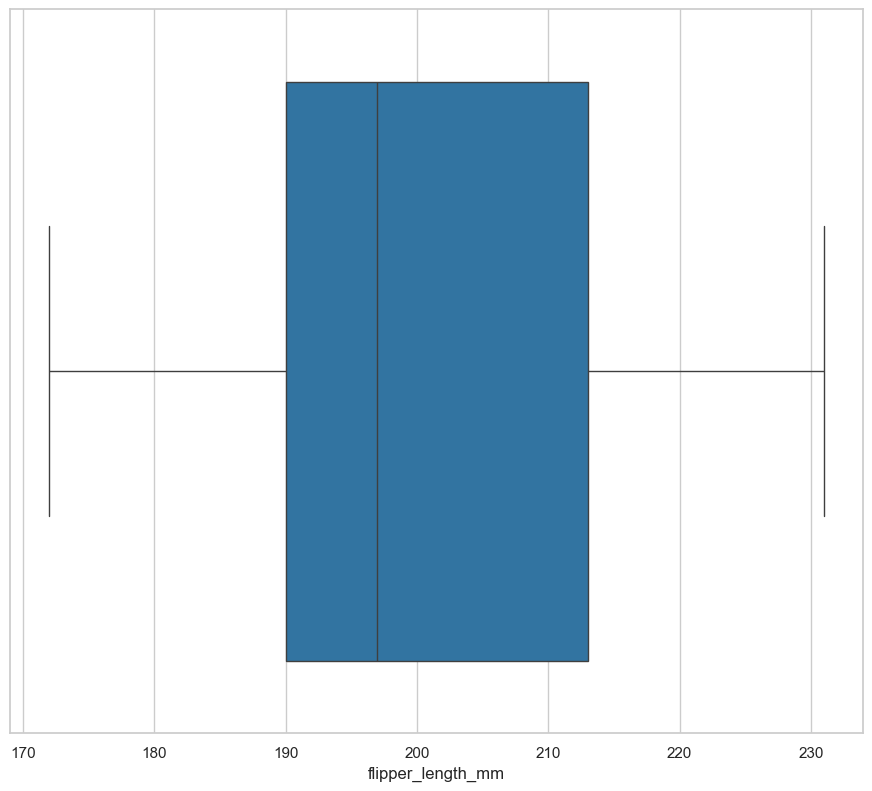

In [43]:
sns.boxplot(data=processed_penguins_df,
            x='flipper_length_mm')

## limitaciones

In [44]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [45]:
bins_sugge =freedman_diaconis_bindwidth(processed_penguins_df.flipper_length_mm)

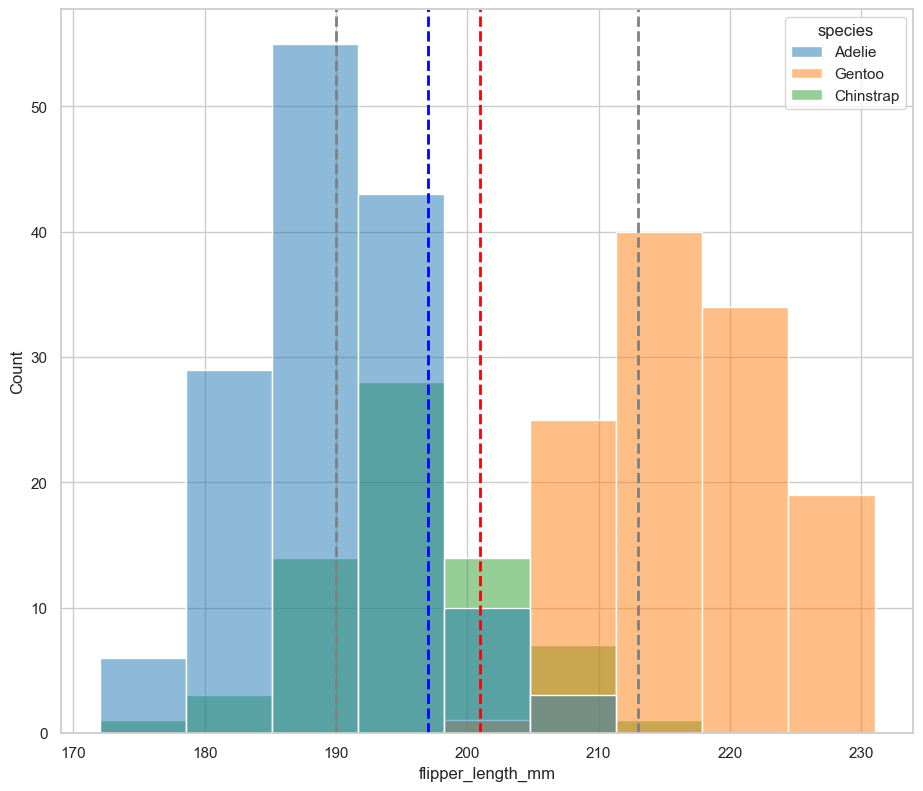

In [46]:
sns.histplot(data=processed_penguins_df,
             x='flipper_length_mm',
             binwidth=bins_sugge,
             hue='species')

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='gray',
    linestyle='dashed',
    linewidth=2
)

# **Distribuciones: PMFs, CDFs y PDFs**
## Funciones de probabilidad de masas (PMFs)
**Utilizando seaborn**


<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

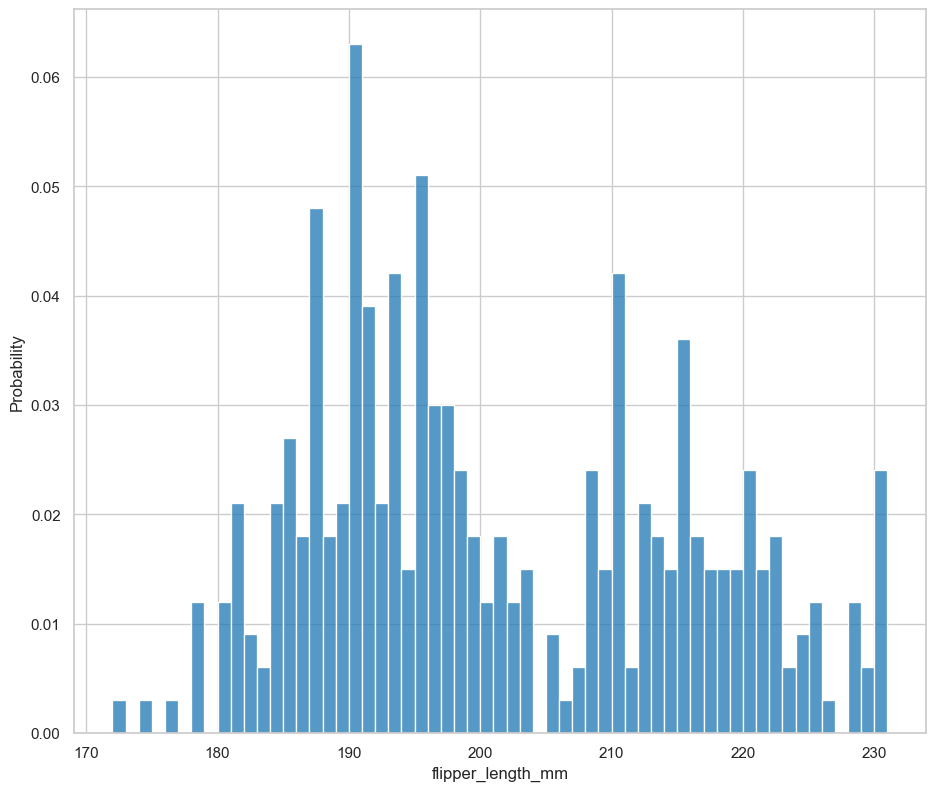

In [47]:
sns.histplot(data=processed_penguins_df,
             x='flipper_length_mm',
             binwidth=1,
             stat='probability')

**Utilizando empiricaldist**


In [48]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,normalize=True)



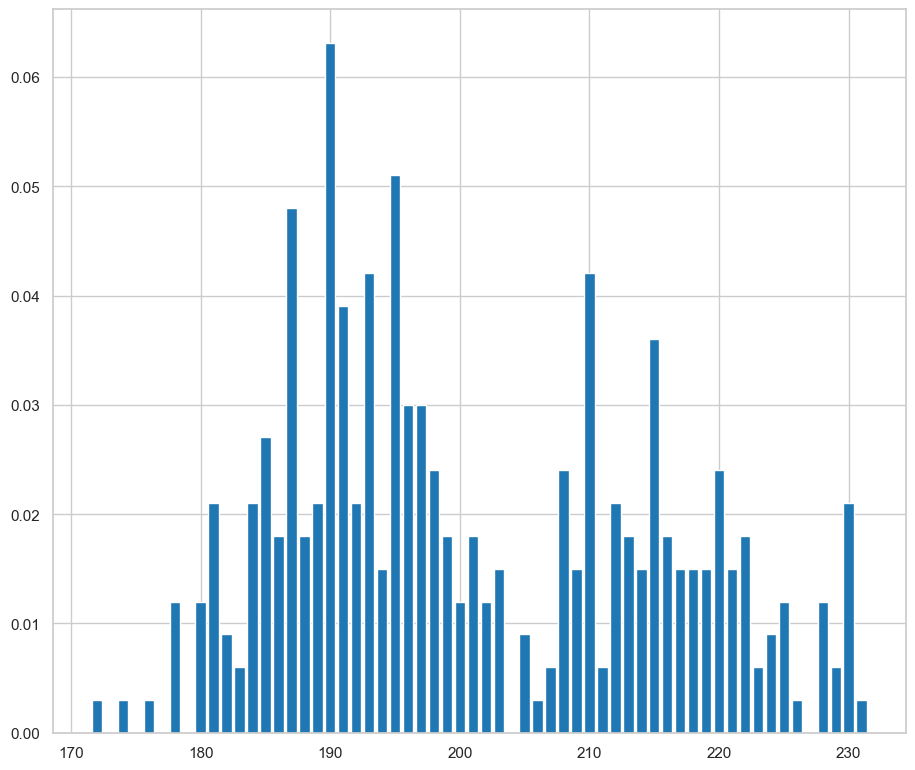

In [49]:
pmf_flipper_length_mm.bar()

In [50]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [51]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)
**Utilizando seaborn**


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

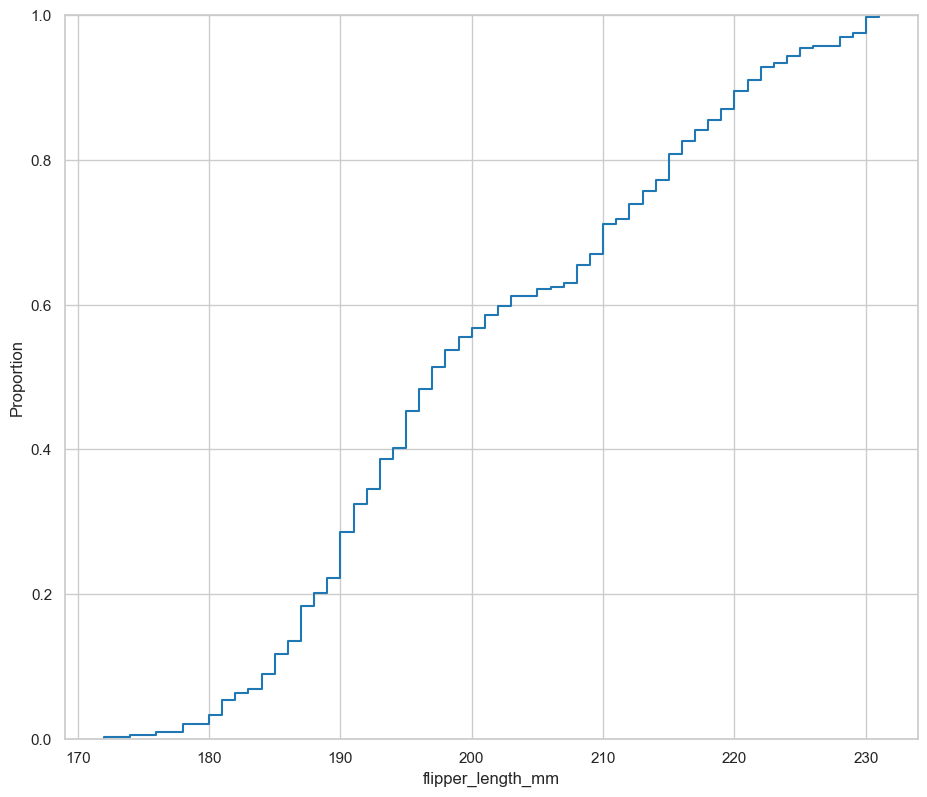

In [52]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

**Utilizando empiricaldist**

200 0.5675675675675675


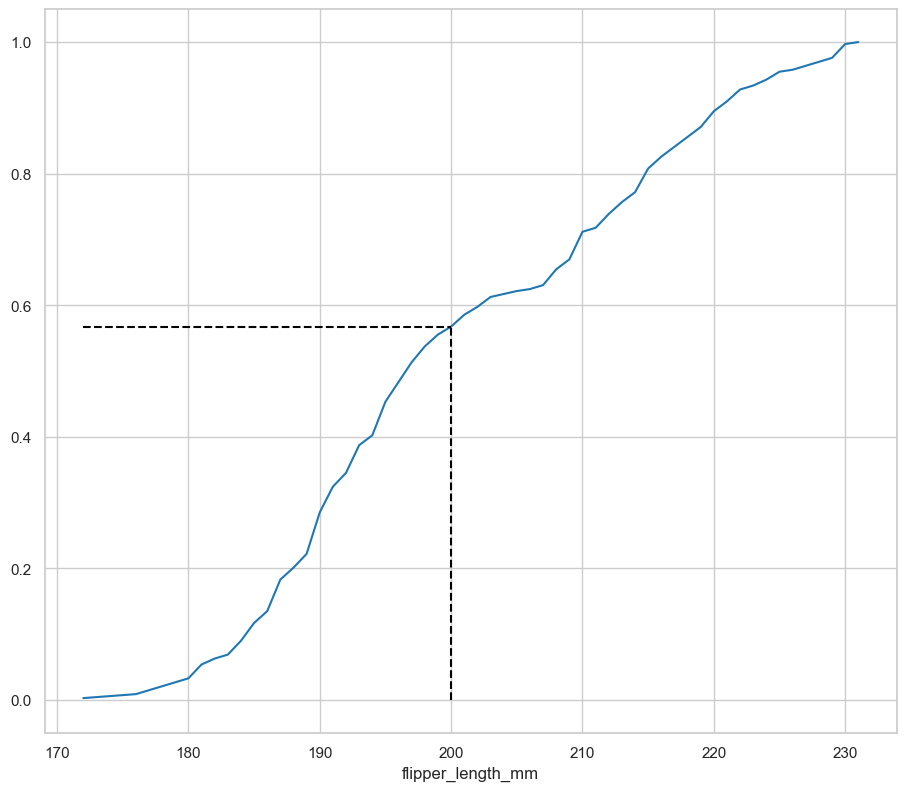

In [53]:
cdf_flipper_length_mm=empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

cdf_flipper_length_mm.plot()
q=200
p = cdf_flipper_length_mm(q)
print(q,p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black', 
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle = 'dashed'
)
plt.plot(q,p)

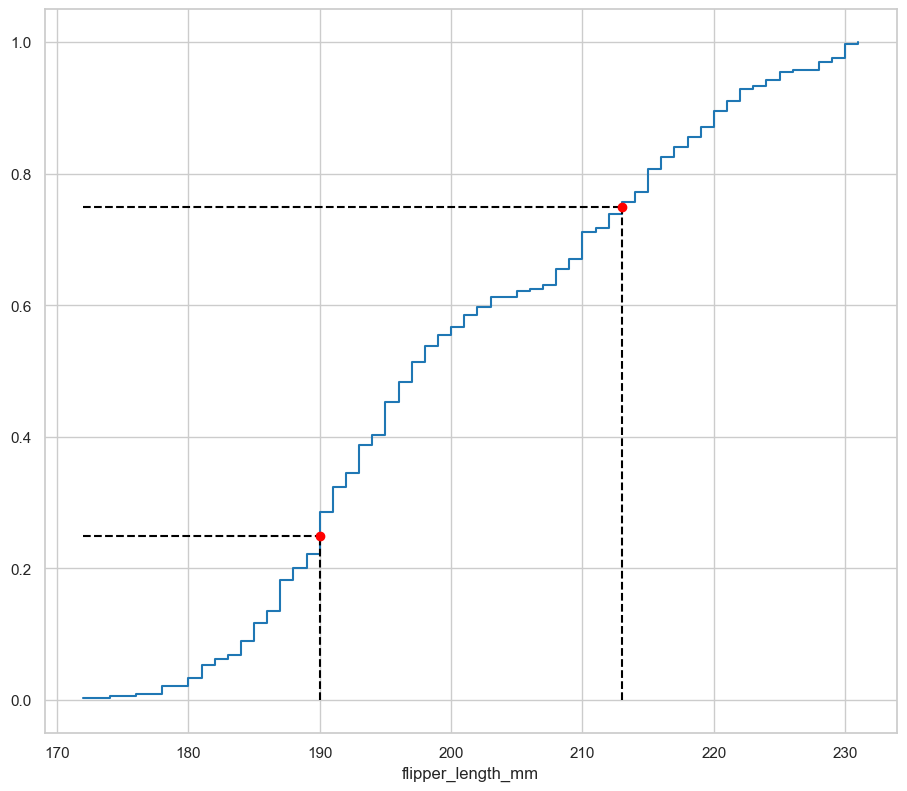

In [54]:
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

**Comparando distribuciones**


<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

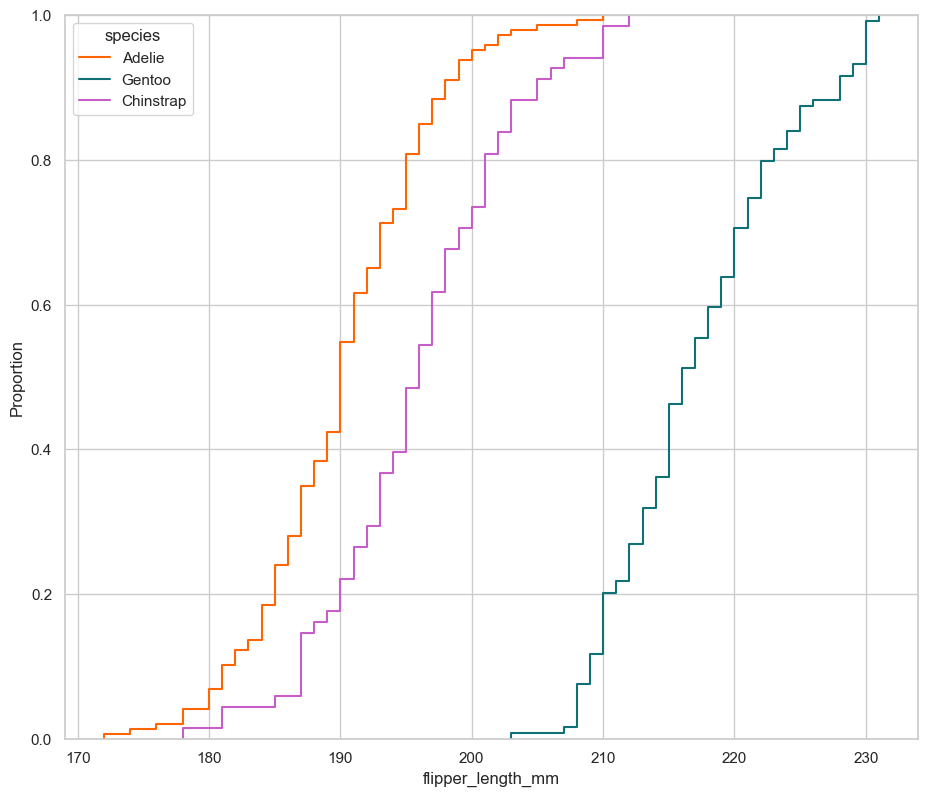

In [55]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Funciones de densidad de probabilidad


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

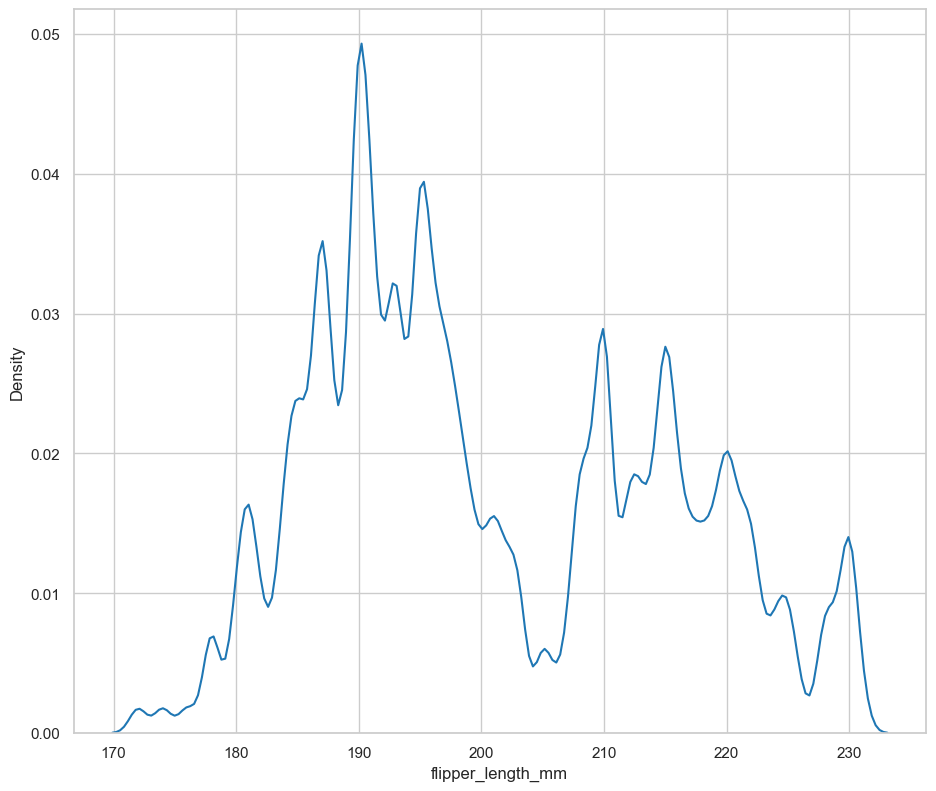

In [56]:
sns.kdeplot(data=processed_penguins_df,
            x='flipper_length_mm', 
            bw_method=0.05)

In [57]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

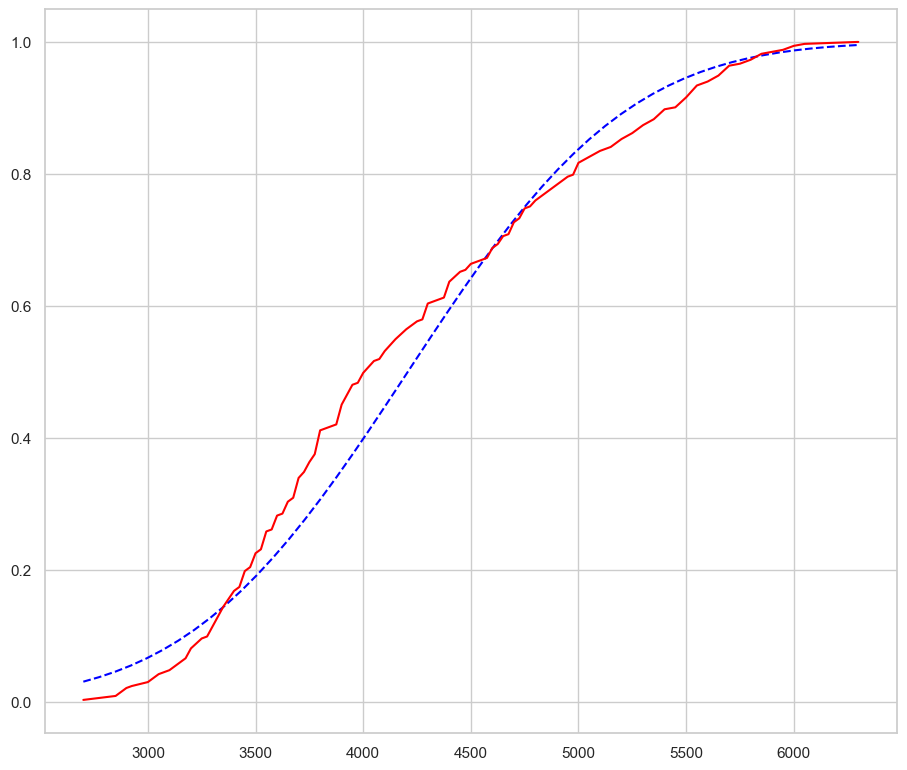

In [58]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
plt.plot(xs, ys,'b',linestyle='dashed')
x3 = empiricaldist.Cdf.from_seq(processed_penguins_df.body_mass_g, normalize=True)
plt.plot(x3,'r')

<Axes: xlabel='body_mass_g', ylabel='Density'>

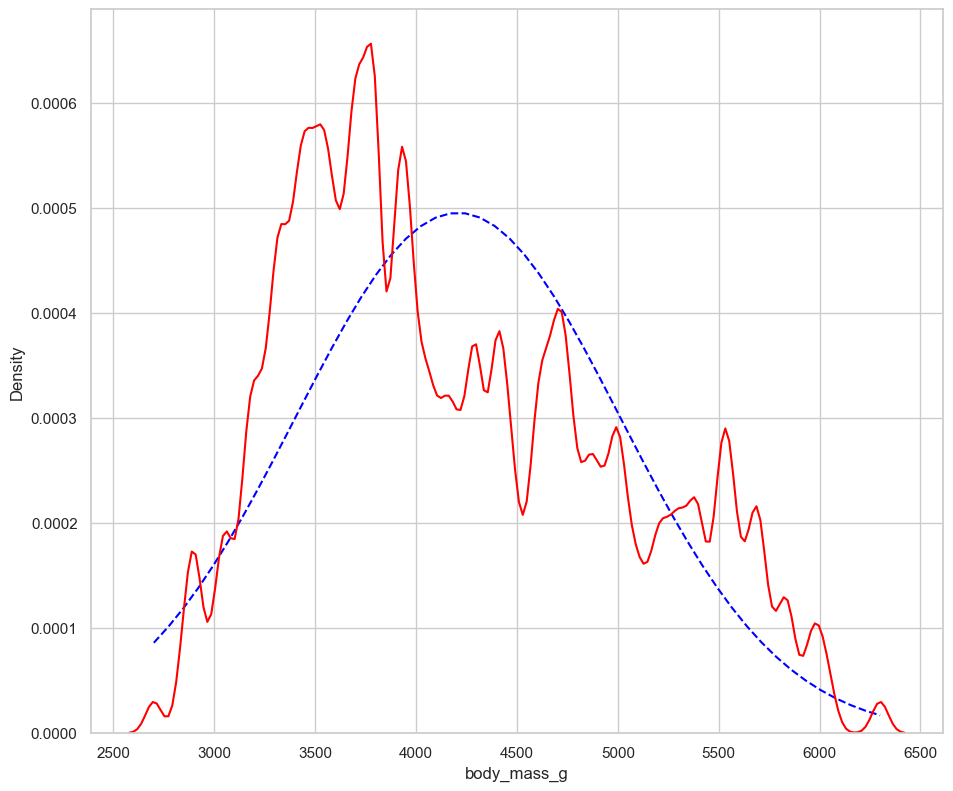

In [59]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
plt.plot(xs, ys,'b', linestyle='dashed')
sns.kdeplot(data=processed_penguins_df,
            x='body_mass_g',
            color='red', 
            bw_method=0.05)


# **Ley de los Grandes Números y Teorema del Límite Central**


## Ley de los Grandes Números


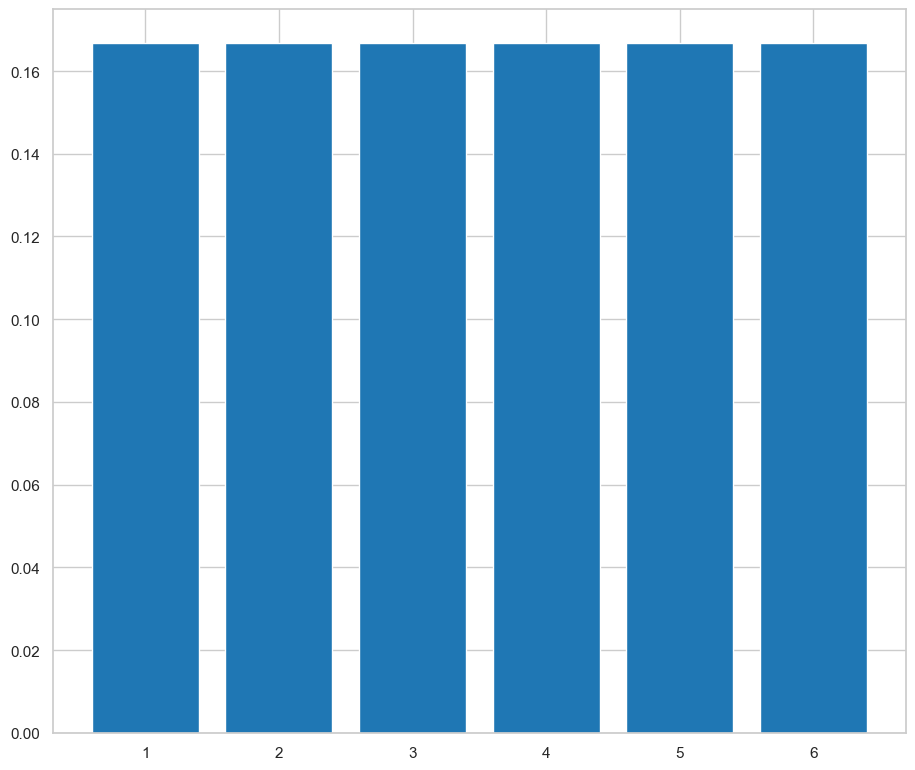

In [60]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

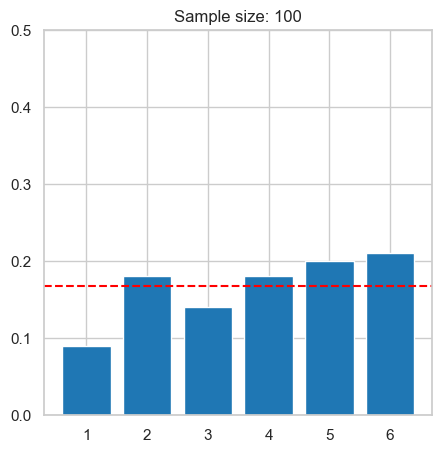

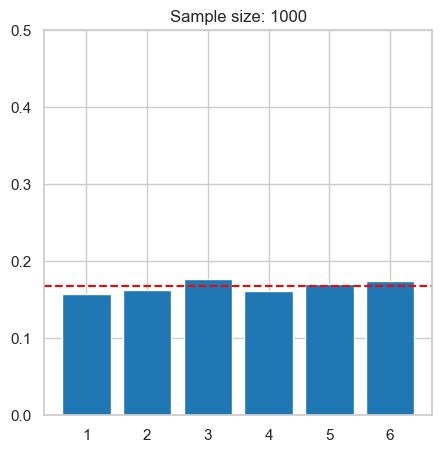

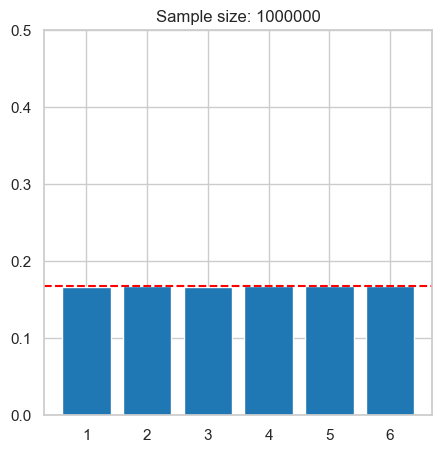

In [61]:
for sample_size in (1e2, 1e3, 1e6):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")

## Teorema del límite central


In [62]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

<Axes: xlabel='sex'>

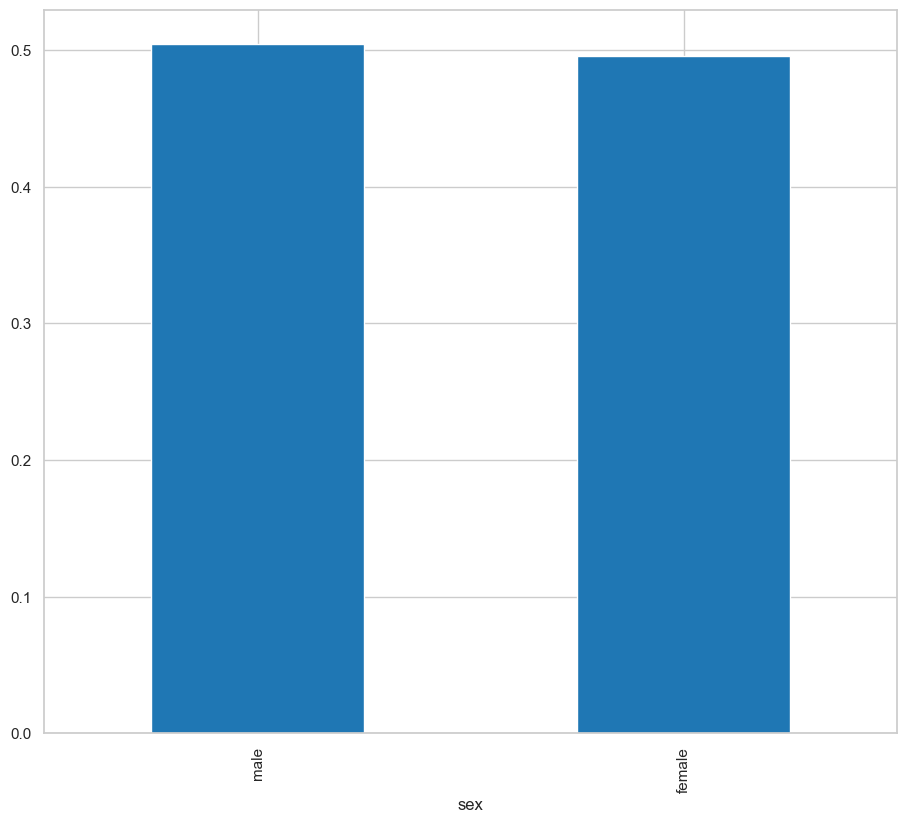

In [63]:
processed_penguins_df.sex.value_counts(normalize=True).plot(kind='bar')

In [64]:
pd.set_option('future.no_silent_downcasting', True)
sex_numeric = processed_penguins_df.sex.replace(['male','female'],[1,0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: object

In [65]:
number_samples = 1000
sample_size=35

samples_df = pd.DataFrame()
# Crear una lista para almacenar cada muestra
samples_list = []

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_list.append( sex_numeric_sample)

# Concatenar todas las muestras en un DataFrame
samples_df = pd.DataFrame(samples_list).T

# Calcular el promedio de machos en la población
male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 50.1829%


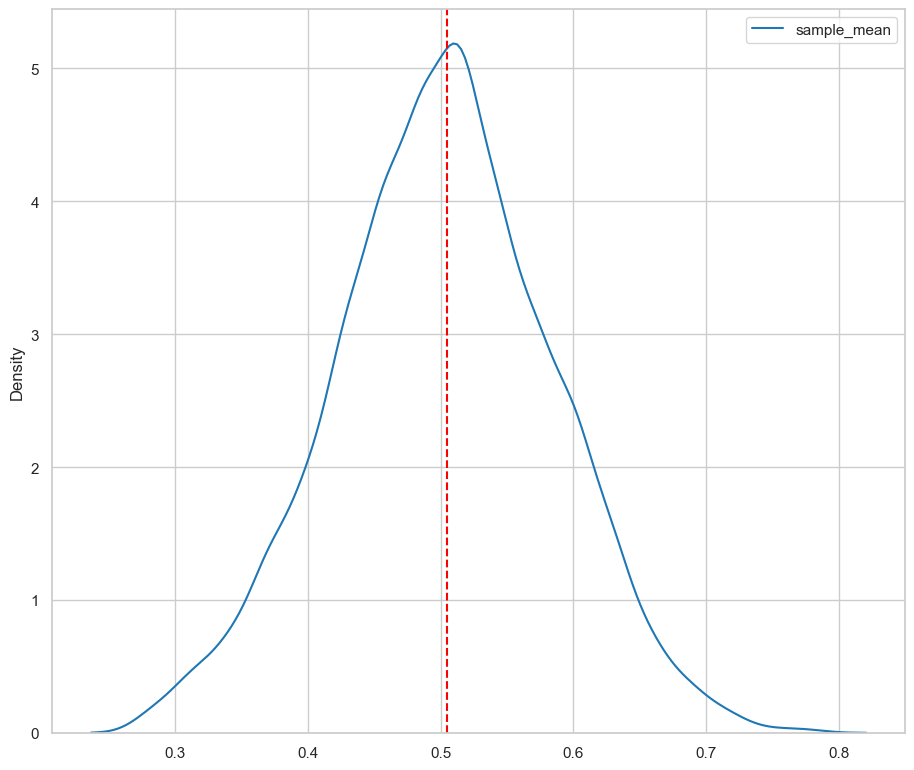

In [66]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial, bw_method=0.20)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [67]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

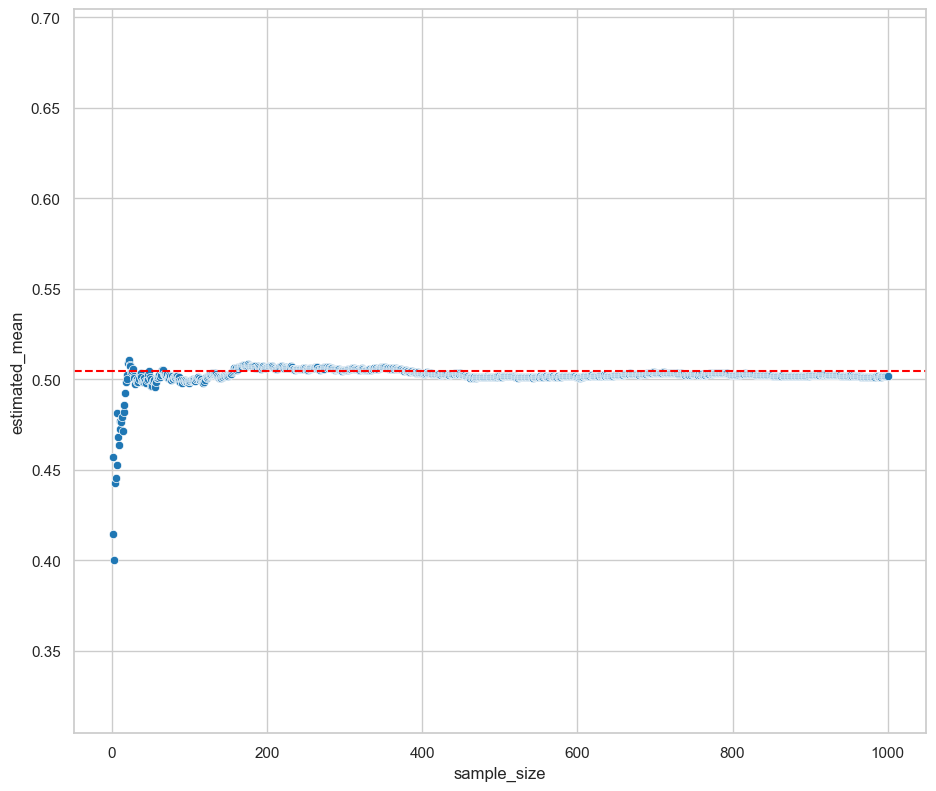

In [68]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones:
## Gráfica de puntos


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

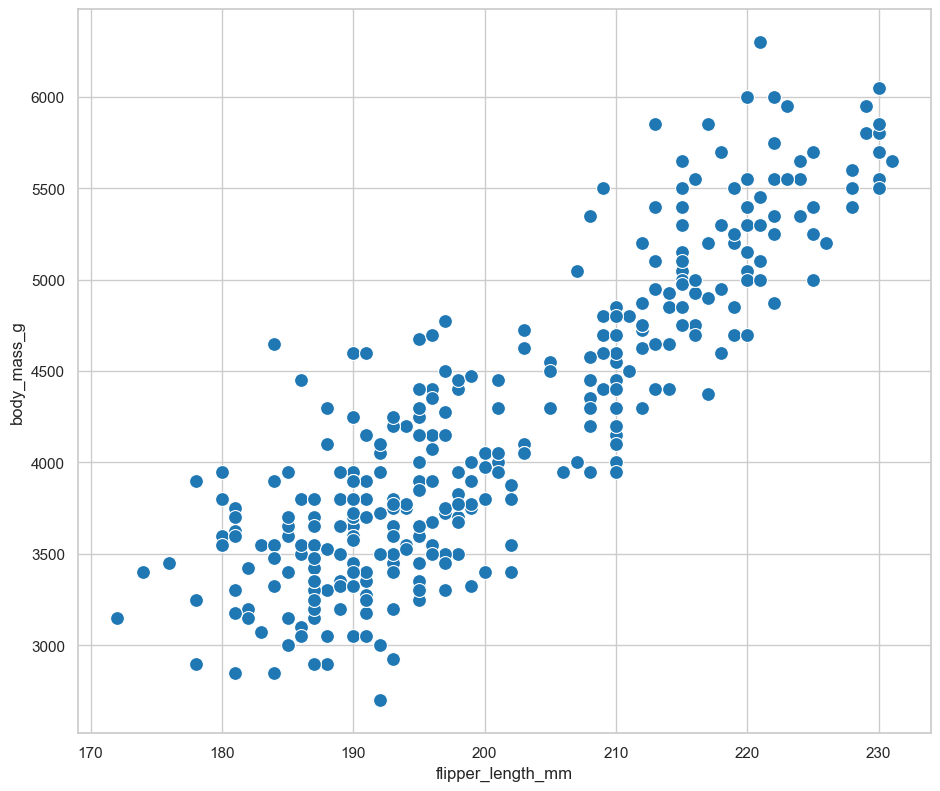

In [69]:

sns.scatterplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    s=100
)


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

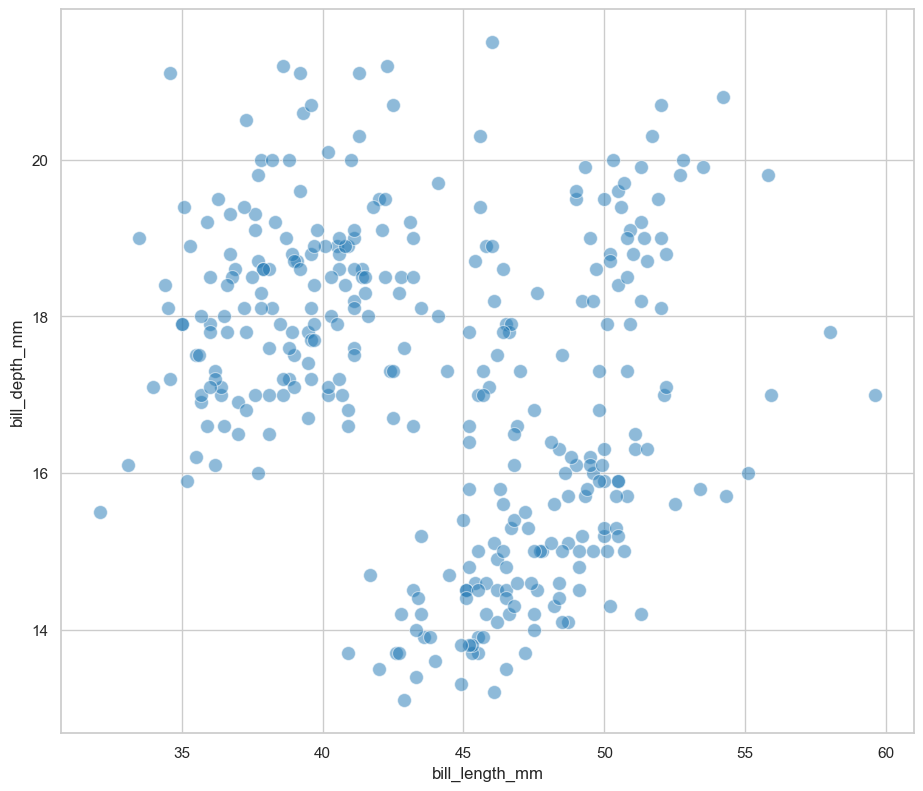

In [70]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    #hue='species',
    alpha=1/2,
    s=100
)

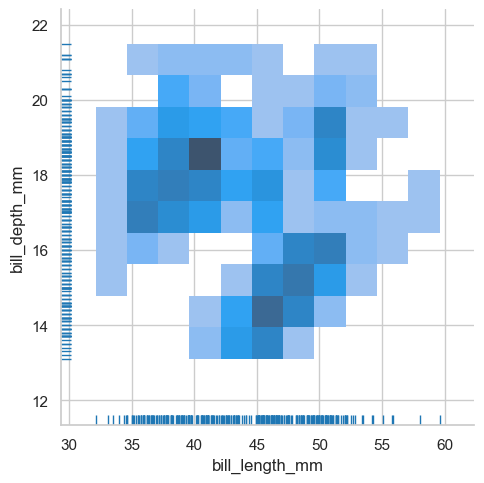

In [71]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
    #hue='species',   
)

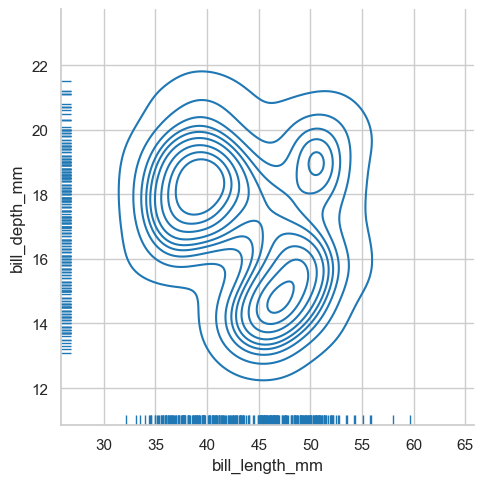

In [72]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    #hue='species',
    kind='kde'
)

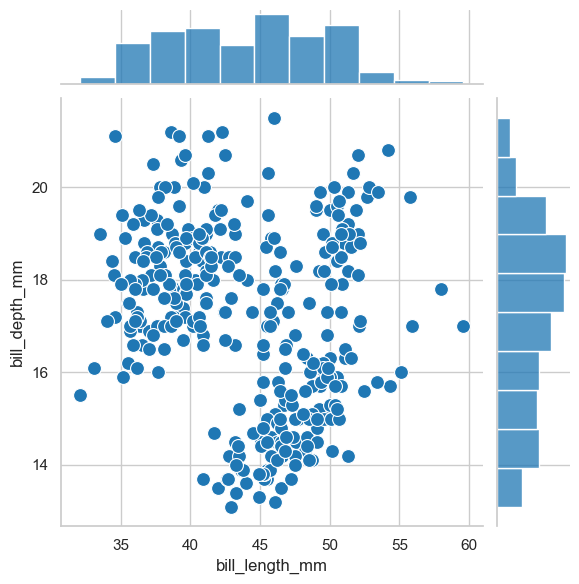

In [73]:
sns.jointplot(data=processed_penguins_df,
              x='bill_length_mm',
              y='bill_depth_mm',
              s=100,
              )

## Estableciendo relaciones: Gráficos de violín y boxplots


<Axes: xlabel='species', ylabel='flipper_length_mm'>

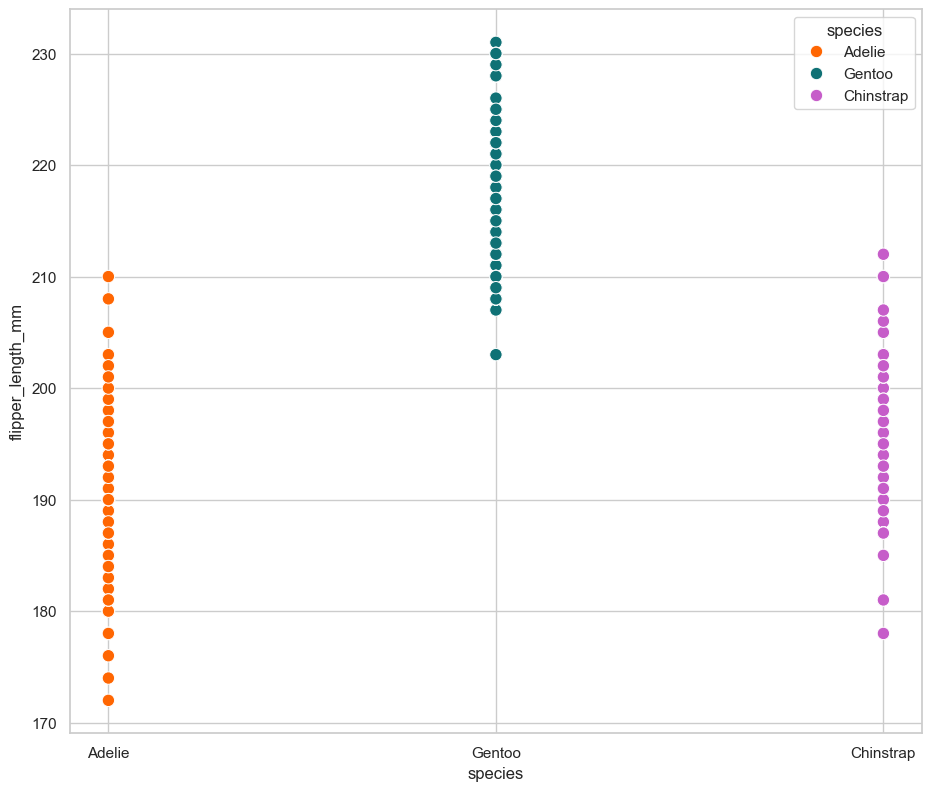

In [74]:
sns.scatterplot(data=processed_penguins_df,
                x='species',
                y='flipper_length_mm',
                s=80, 
                hue='species', 
                palette=penguin_color)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

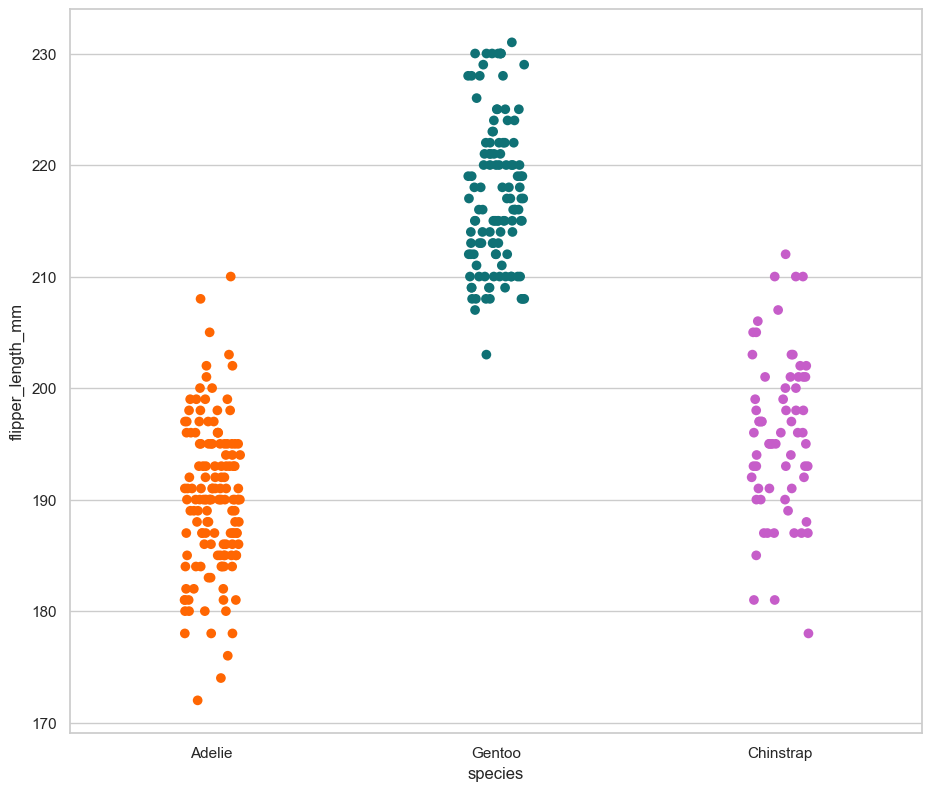

In [75]:
sns.stripplot(data=processed_penguins_df,
              x='species',
              y='flipper_length_mm',
              hue='species',
              palette=penguin_color,
              s=7)

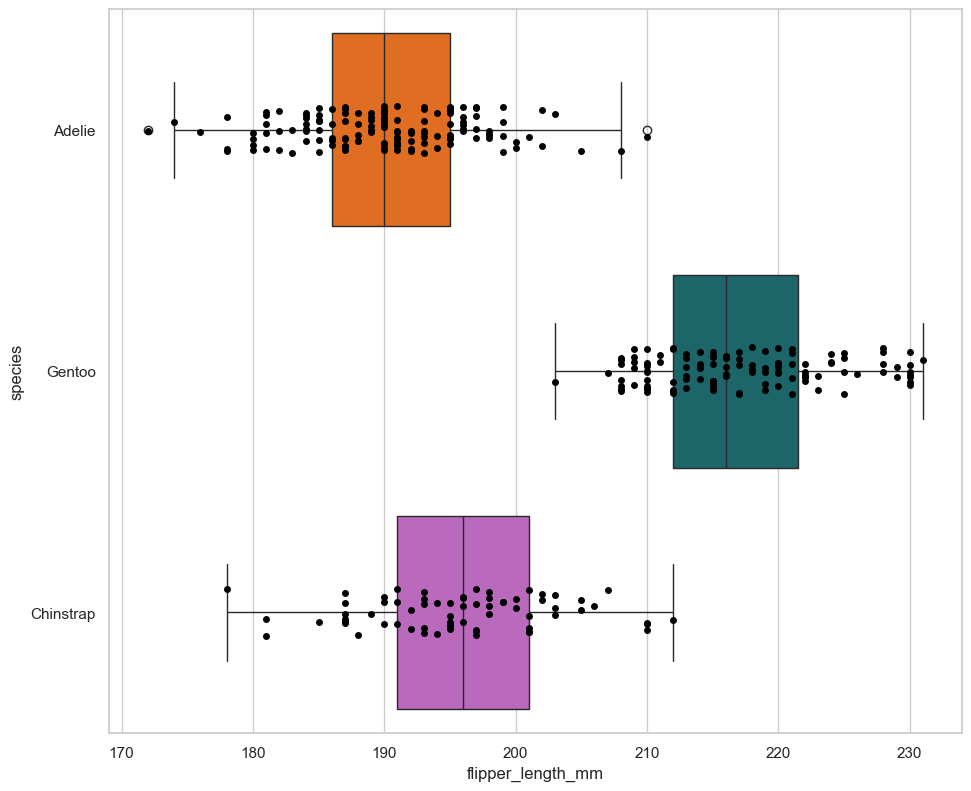

In [76]:
ax = sns.boxplot(data=processed_penguins_df,
            x='flipper_length_mm',
            y='species',
            hue='species',
            palette=penguin_color,
            )

ax = sns.stripplot(data=processed_penguins_df,
            x='flipper_length_mm',
            y='species',
            #hue='species',
            color='black',
            )

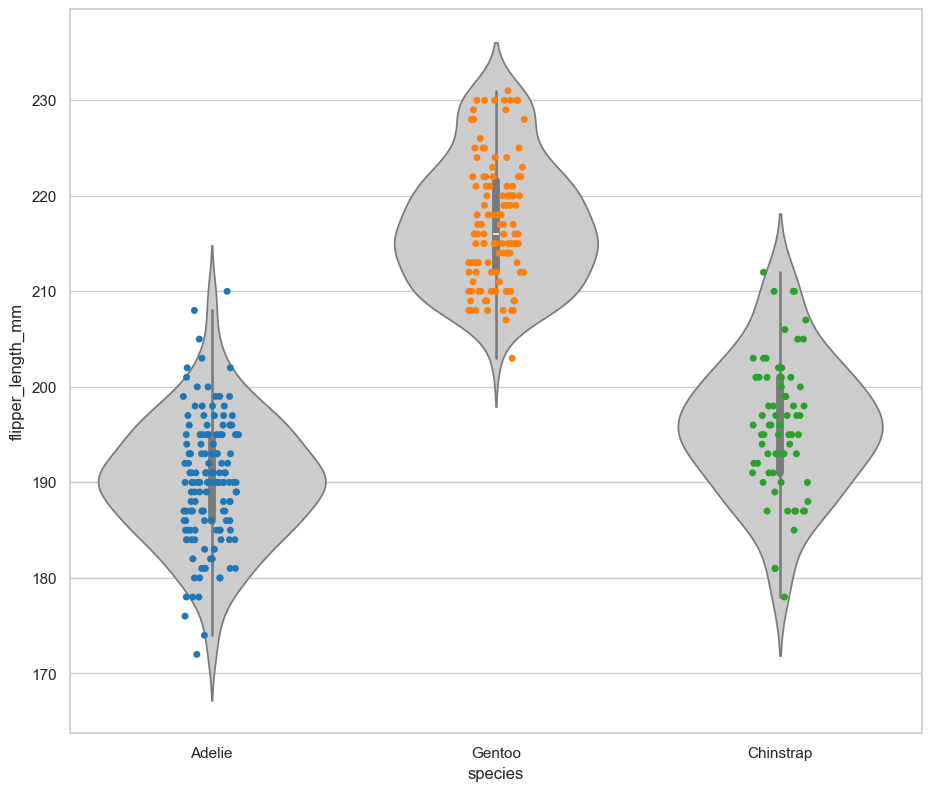

In [77]:
ax = sns.violinplot(data=processed_penguins_df,
                    x='species',
                    y='flipper_length_mm',
                    color='.8'
                    )

ax = sns.stripplot(data=processed_penguins_df,
            x='species',
            y='flipper_length_mm',           
            hue='species',
            
            )

<Axes: xlabel='species', ylabel='flipper_length_mm'>

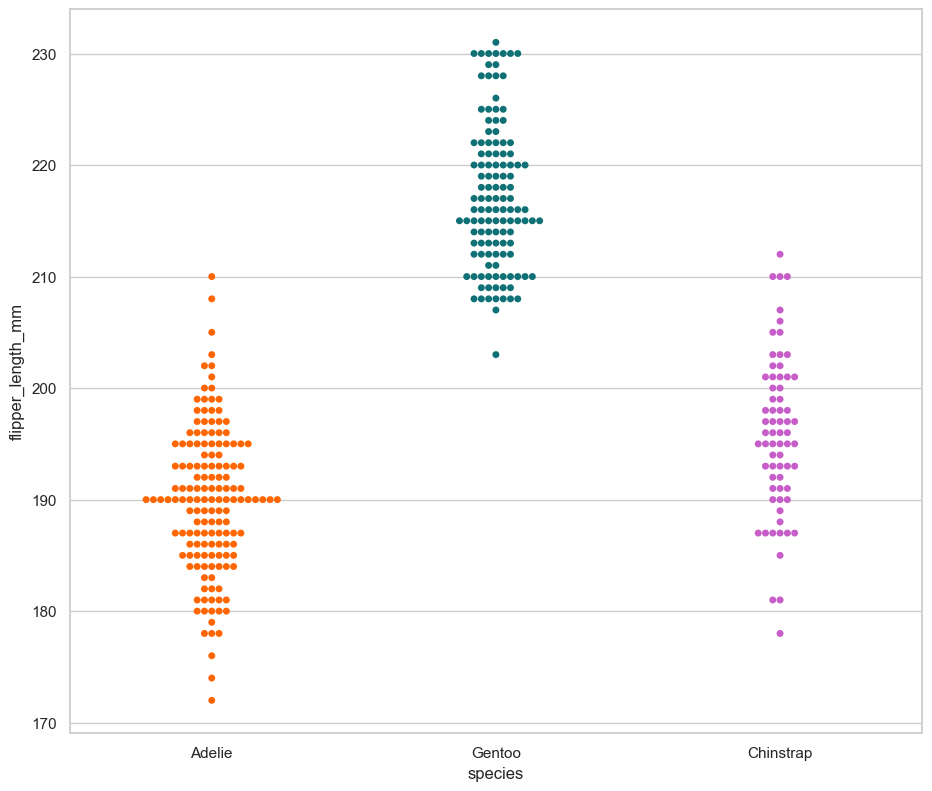

In [78]:
sns.swarmplot(data=preprocessed_penguins_df,
              x='species',
              y='flipper_length_mm',
              hue='species',
              palette=penguin_color)

# Estableciendo relaciones: Matrices de correlación
## ¿Existe una correlación lineal entre alguna de nuestras variables?


In [80]:
numerical_df = processed_penguins_df.select_dtypes(include=[float, int])

numerical_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


## ¿Como puedo visualizar los coeficientes de correlación?


<Axes: >

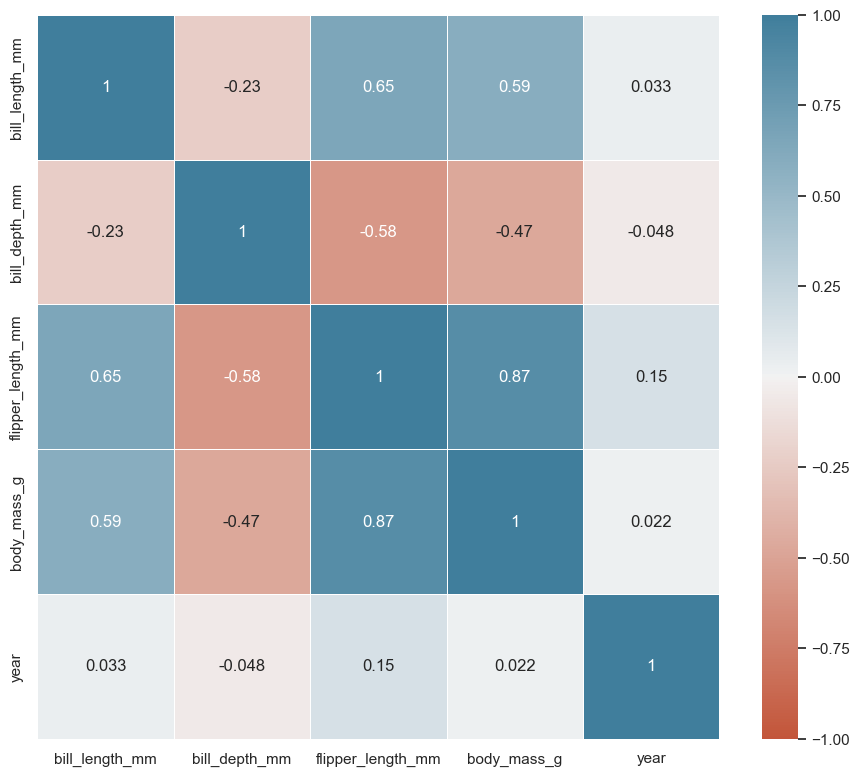

In [86]:
sns.heatmap(
    data=numerical_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

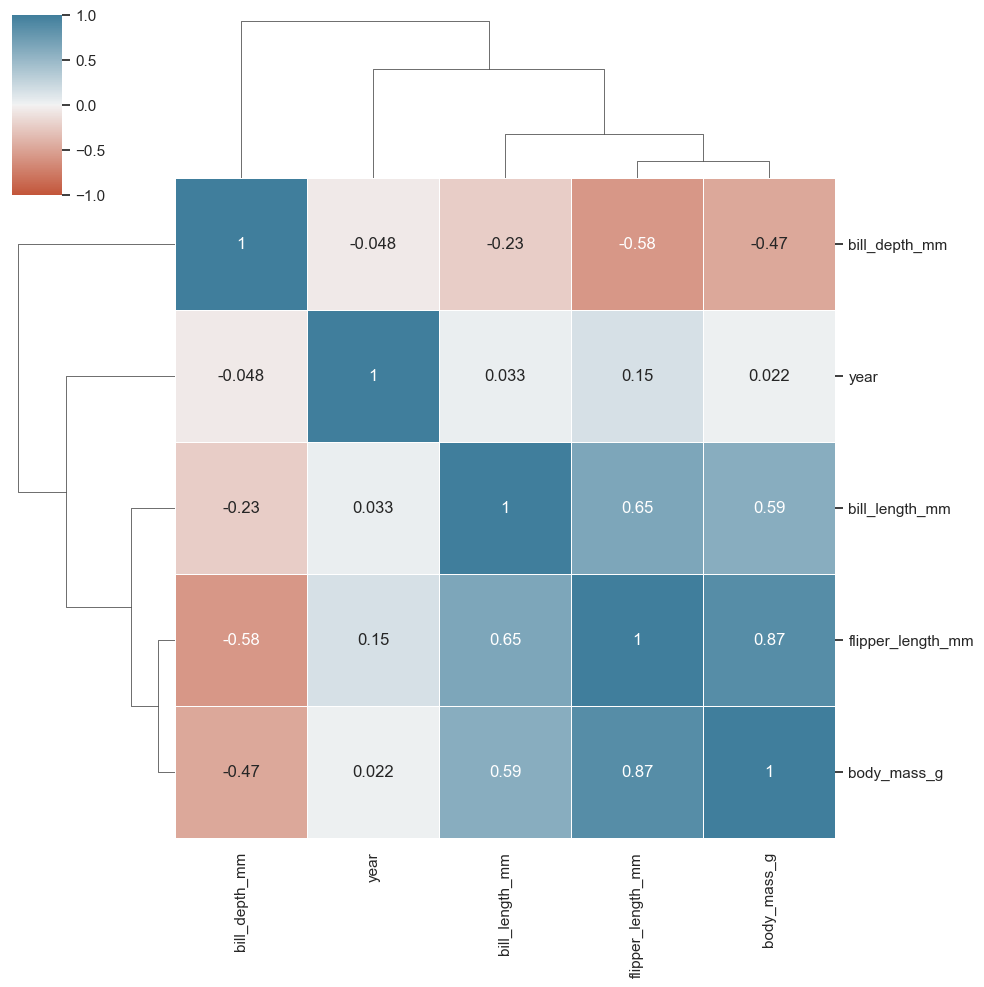

In [87]:
sns.clustermap(
    data=numerical_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

## Cómo podría representar una variable categórica como numérica discreta?

In [124]:
processed_penguins_df=processed_penguins_df.assign(
    numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0,1]).astype(int)
)

In [125]:
numerical_df3 = processed_penguins_df.select_dtypes(include=[float, int])

print(processed_penguins_df.numeric_sex.dtype)

int32


In [126]:
numerical_df3

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,numeric_sex
0,39.1,18.7,181.0,3750.0,2007,1
1,39.5,17.4,186.0,3800.0,2007,0
2,40.3,18.0,195.0,3250.0,2007,0
4,36.7,19.3,193.0,3450.0,2007,0
5,39.3,20.6,190.0,3650.0,2007,1
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1
340,43.5,18.1,202.0,3400.0,2009,0
341,49.6,18.2,193.0,3775.0,2009,1
342,50.8,19.0,210.0,4100.0,2009,1


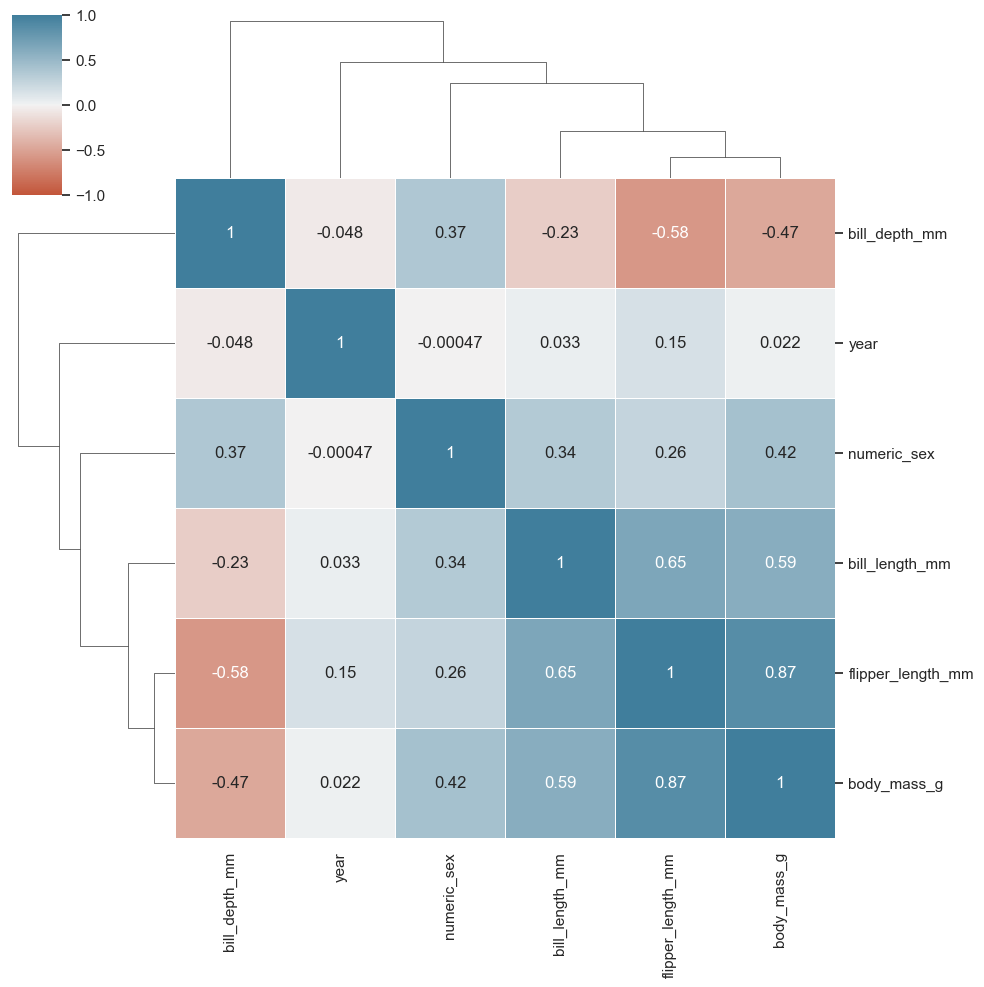

In [127]:
sns.clustermap(
    data=numerical_df3.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

## ¿Cuál es una límitante de los coeficientes de correlación lineal?
Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación


array([[1.        , 0.04972597],
       [0.04972597, 1.        ]])

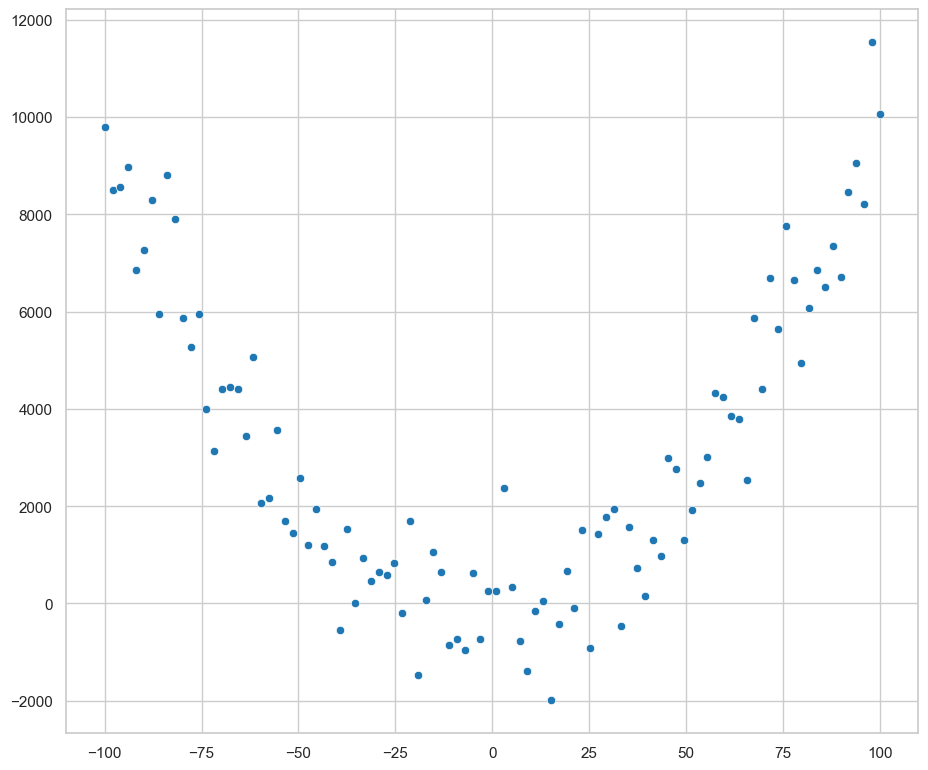

In [132]:
x= np.linspace(-100,100,100)
y=x**2
y+= np.random.normal(0,1000,x.size)
sns.scatterplot(x=x,y=y)


np.corrcoef(x,y)

array([[1.        , 0.91670931],
       [0.91670931, 1.        ]])

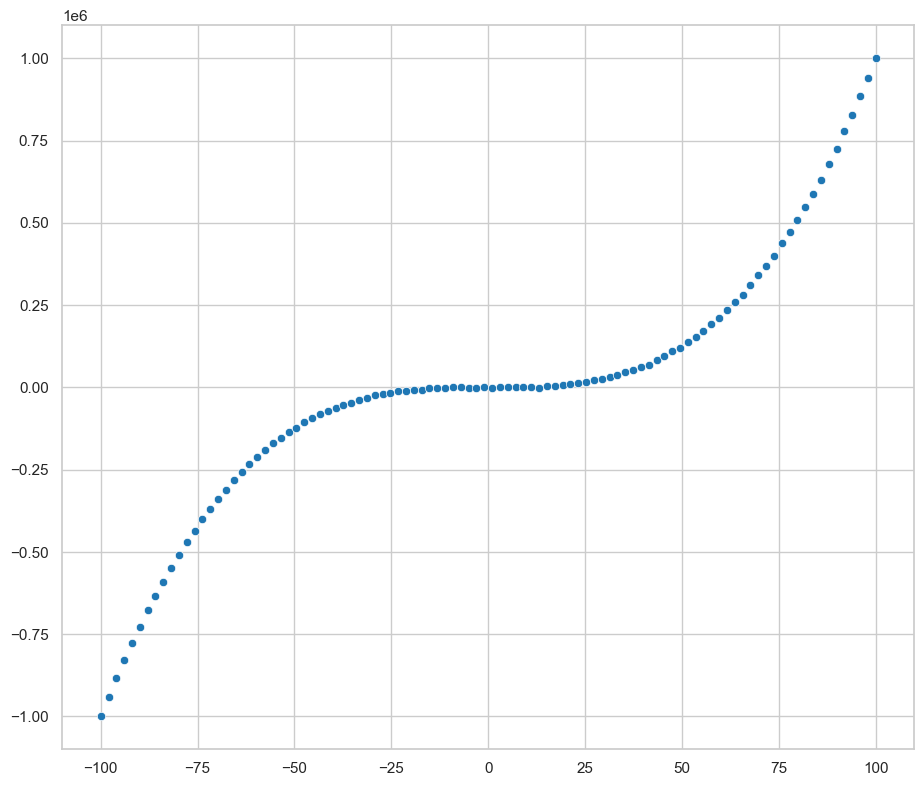

In [135]:
x= np.linspace(-100,100,100)
y=x**3
y+= np.random.normal(0,1000,x.size)
sns.scatterplot(x=x,y=y)


np.corrcoef(x,y)


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

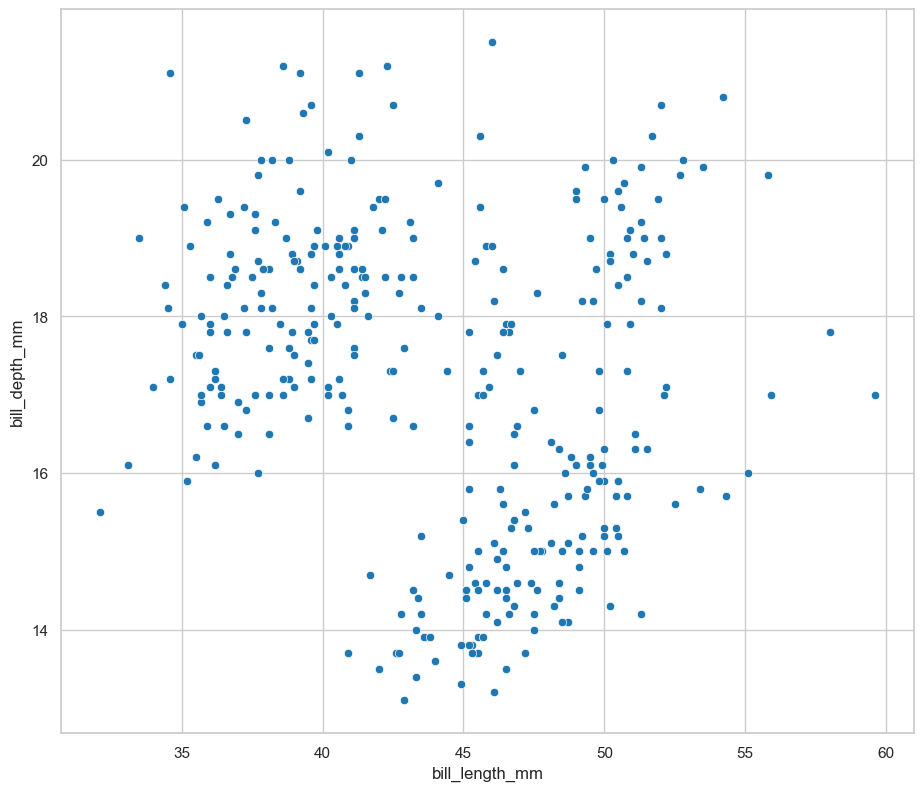

In [136]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

In [145]:
#np.corrcoef(processed_penguins_df.bill_length_mm,preprocessed_penguins_df.bill_depth_mm)
datatemp = processed_penguins_df[['bill_length_mm', 'bill_depth_mm']]
datatemp.dropna()
datatemp.corr()

,bill_length_mm,bill_depth_mm
bill_length_mm,1.000000,-0.228626
bill_depth_mm,-0.228626,1.000000


# El coeficiente de correlación no nos habla del impacto de la relación


[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


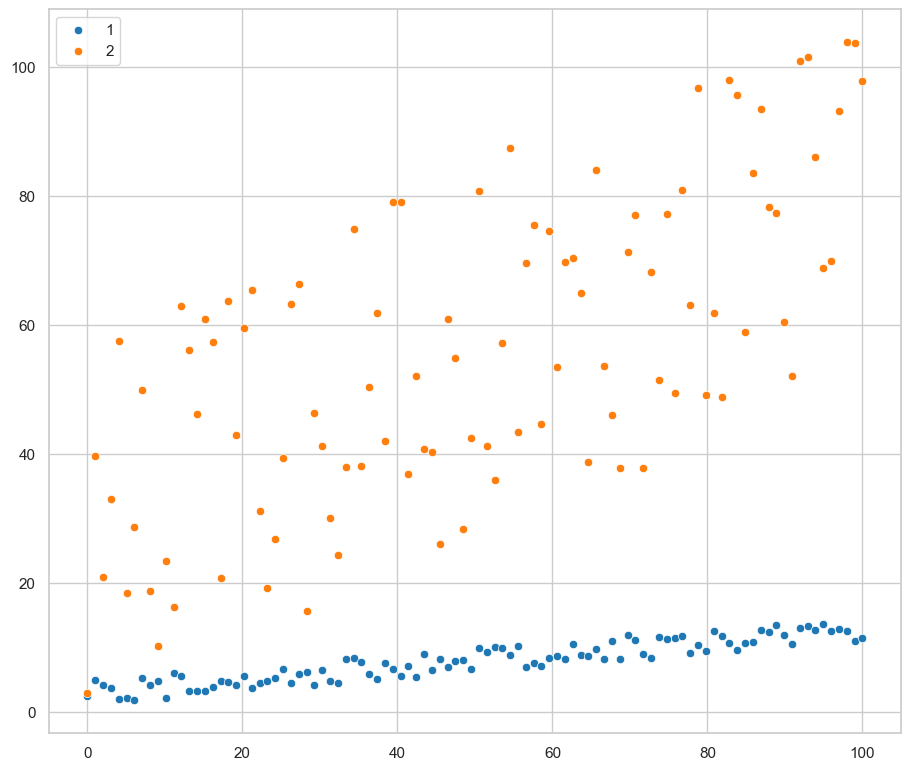

In [146]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

# Estableciendo relaciones: Análisis de regresión simple


In [148]:
res1=scipy.stats.linregress(x=x_1, y=y_1)
res2=scipy.stats.linregress(x=x_2, y=y_2)
print(res1, res2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


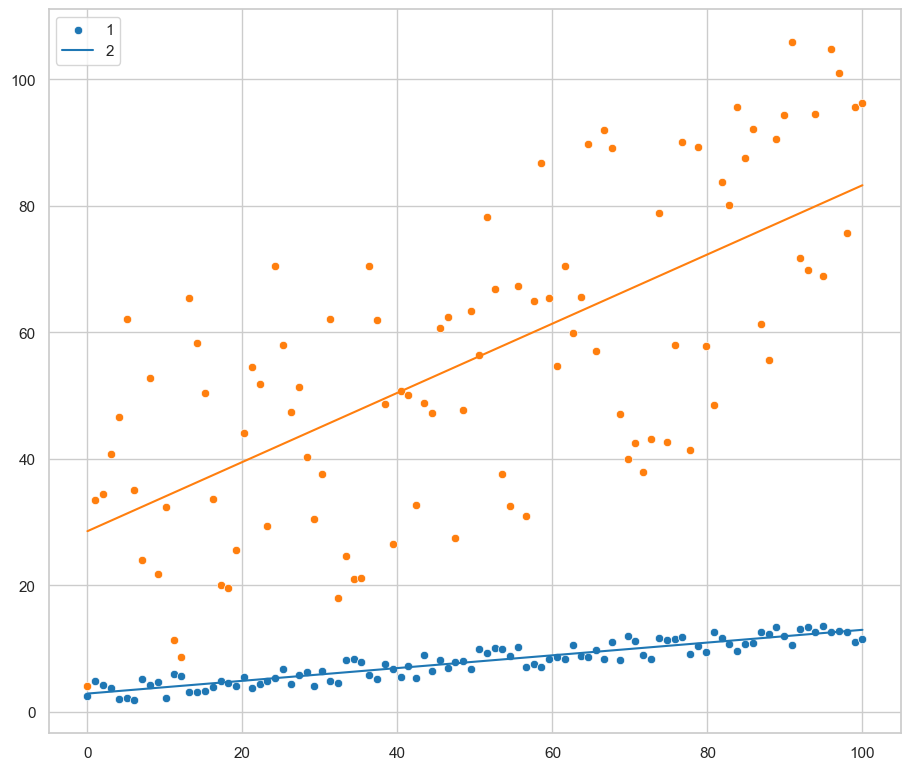

In [187]:

sns.scatterplot(
    x=x_1,
    y=y_1
)
fx_1 = np.array([x_1.min(),x_1.max()])
fy_1 = res1.intercept + res1.slope * fx_1
plt.plot(fx_1,fy_1)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)


sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(),x_2.max()])
fy_2 = res2.intercept + res2.slope * fx_2
plt.plot(fx_2,fy_2)
plt.legend(labels=['1', '2'])



LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


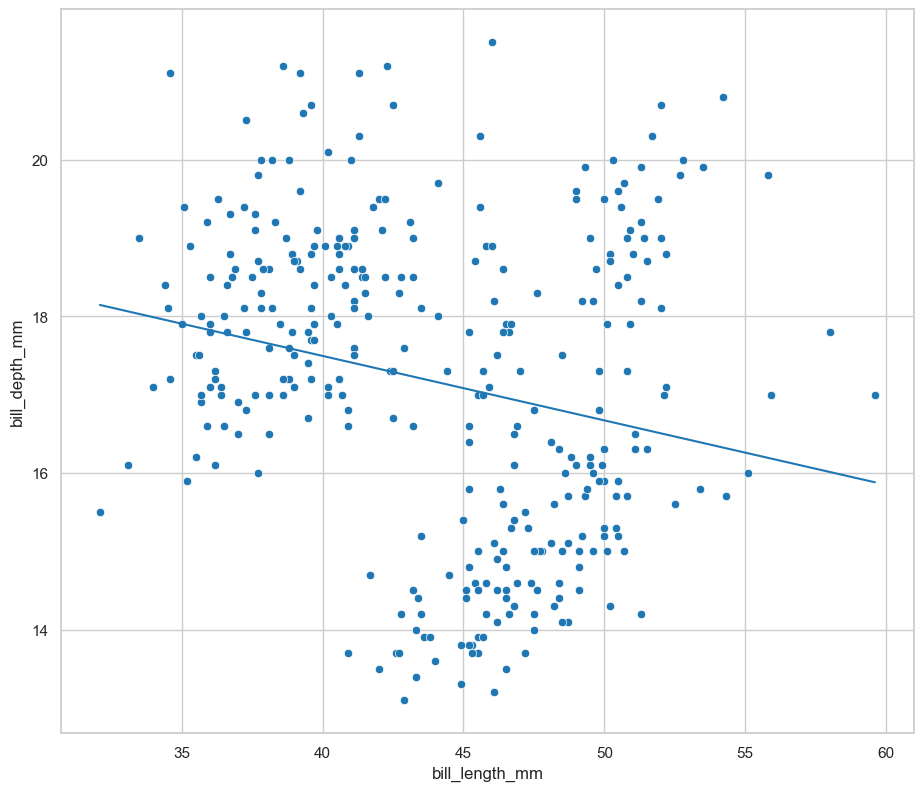

In [152]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
res_penguins = scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)
print(res_penguins)
fx_3 = np.array([processed_penguins_df.bill_length_mm.min(),processed_penguins_df.bill_length_mm.max()])
fy_3 = res_penguins.intercept + res_penguins.slope * fx_3
plt.plot(fx_3,fy_3)


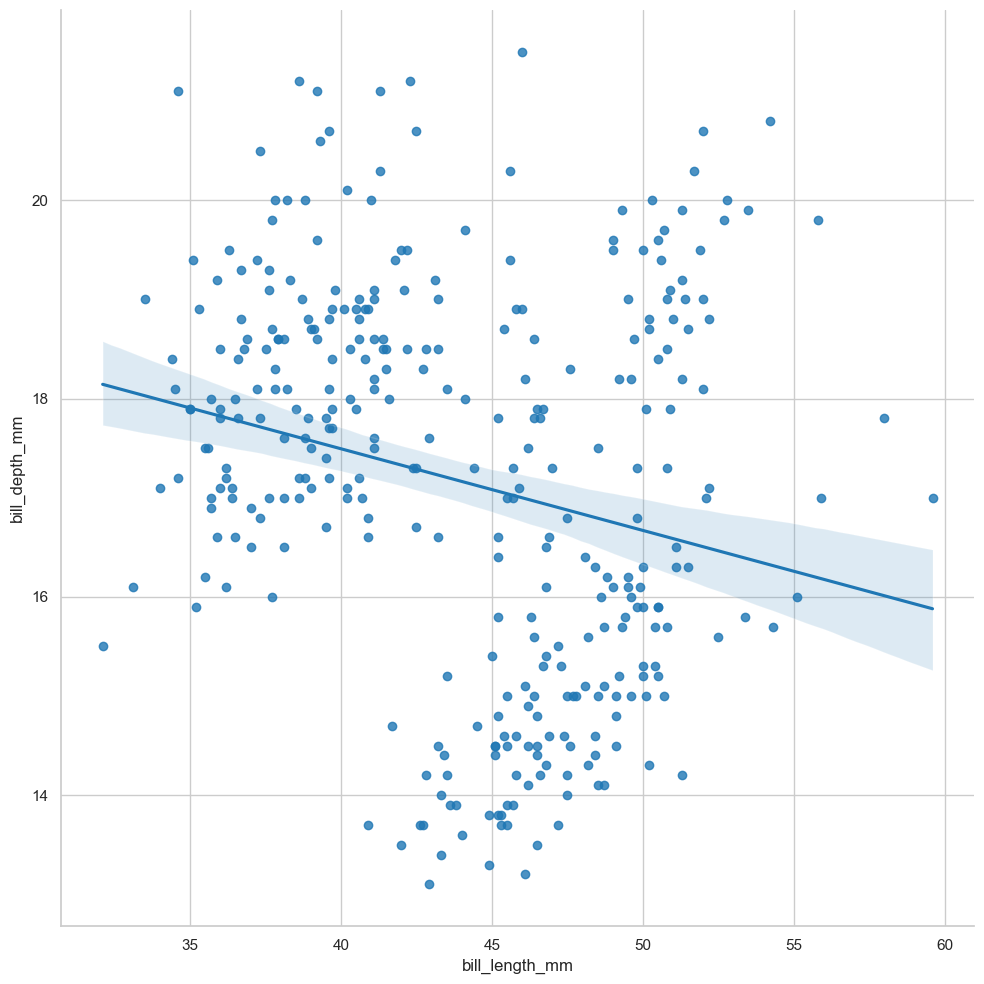

In [157]:
sns.lmplot(data=processed_penguins_df,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10,
           )

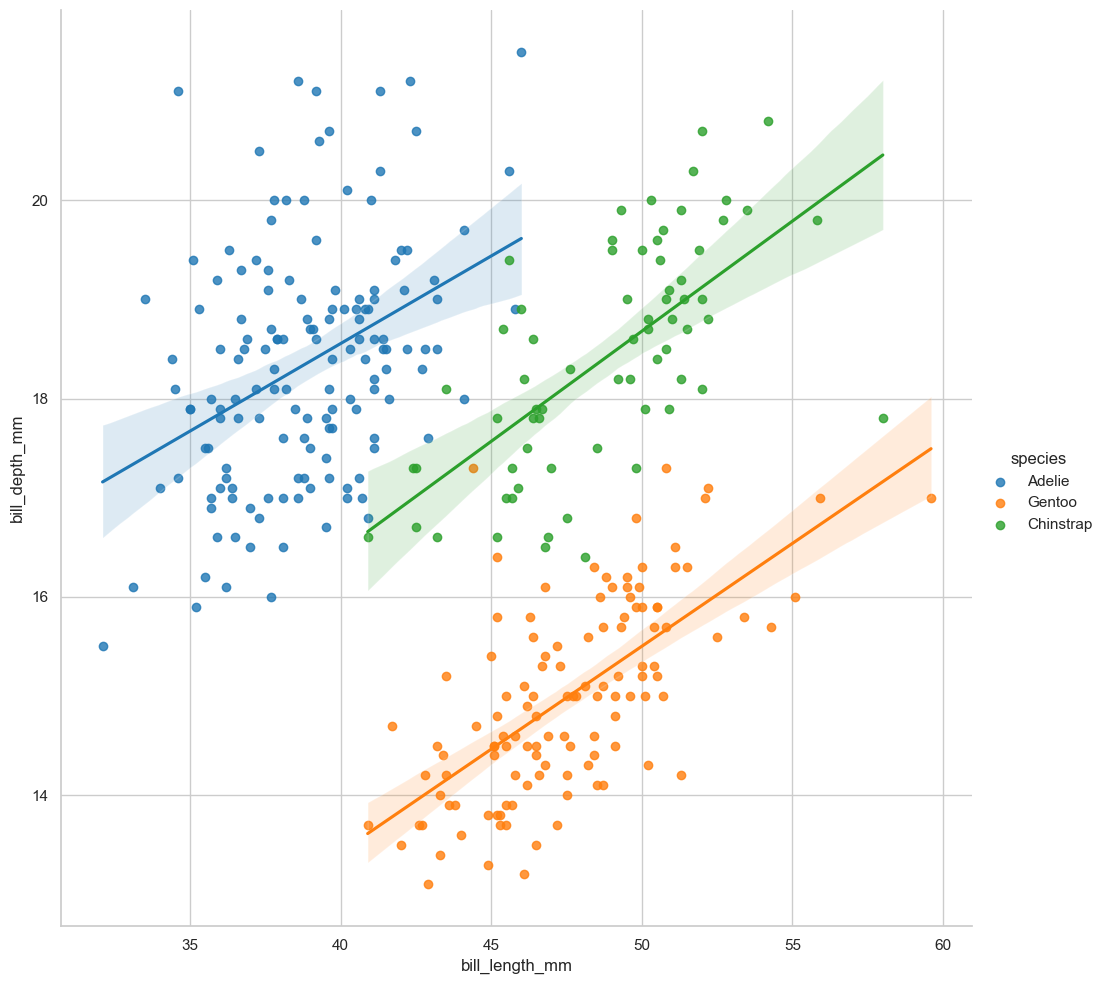

In [154]:
sns.lmplot(data=processed_penguins_df,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10,
           hue='species'
           )

## Limitaciones del análisis de regresión simple
**La regresión lineal simple no es simétrica**


In [168]:
x=processed_penguins_df.bill_length_mm
y=processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x,y=y)

res_y_x = scipy.stats.linregress(x=y,y=x)

print(res_x_y, res_y_x, sep='\n')


LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


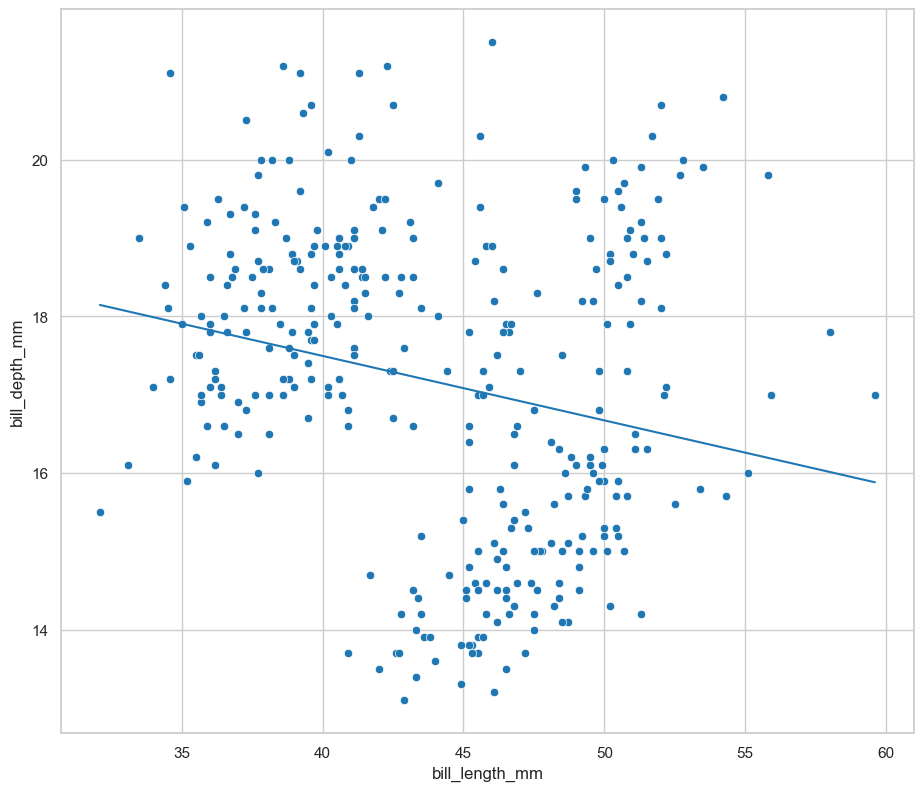

In [193]:
#clase grafica 1

sns.scatterplot( x=x, y=y )

fx_1= np.array([x.min(), x.max()]) 
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

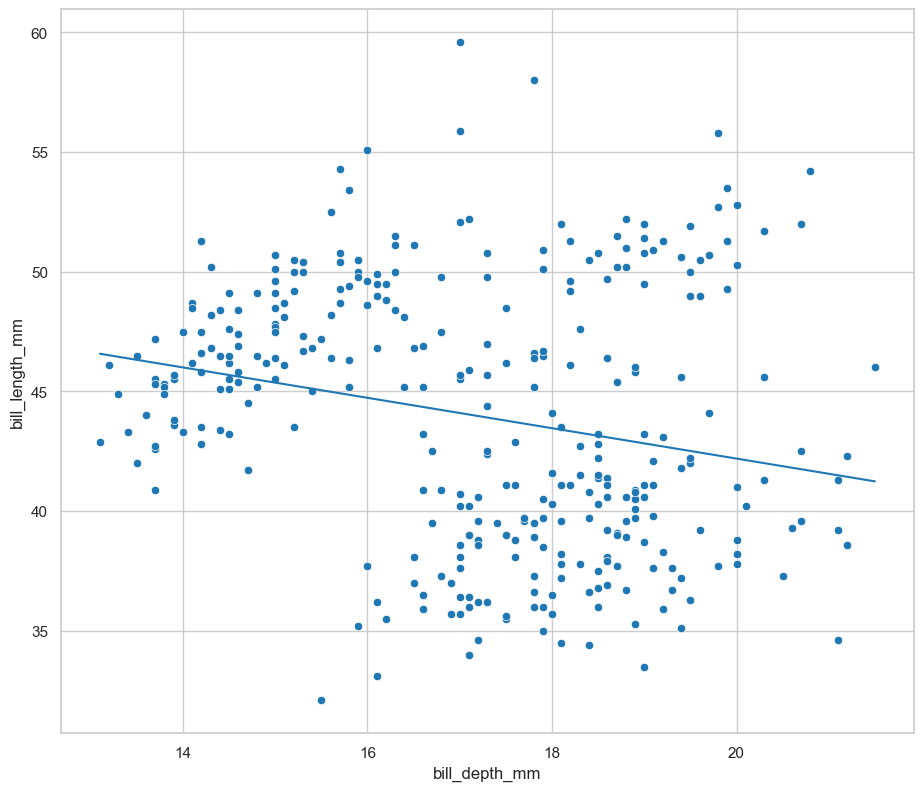

In [195]:
#grafica 2

sns.scatterplot( x=y, y=x )

fx_2= np.array([y.min(), y.max()]) 
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2);

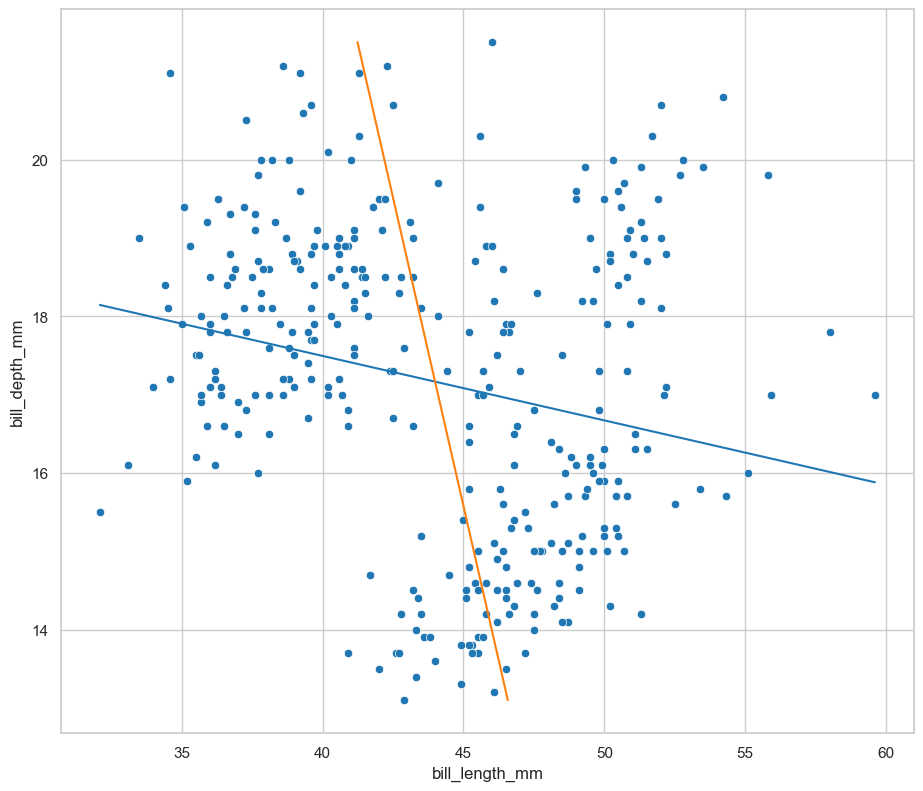

In [197]:
#grafica 3

sns.scatterplot( x=x, y=y ) 
plt.plot(fx_1, fy_1) 
plt.plot(fy_2, fx_2);

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables


In [201]:
smf.ols(
    formula='bill_length_mm ~ bill_depth_mm',
    data=processed_penguins_df
).fit().params

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [202]:
smf.ols(
    formula='bill_depth_mm ~ bill_length_mm',
    data=processed_penguins_df
).fit().params

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64